In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, ArrowStyle, Rectangle
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.patheffects import withStroke
from matplotlib.colors import to_rgb

import networkx as nx

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import os
import os.path as op

import importlib

import dgsp
import graph_examples as dgsp_graphs
import plotting as dgsp_plot

import bimod_plots as plot

([], [])

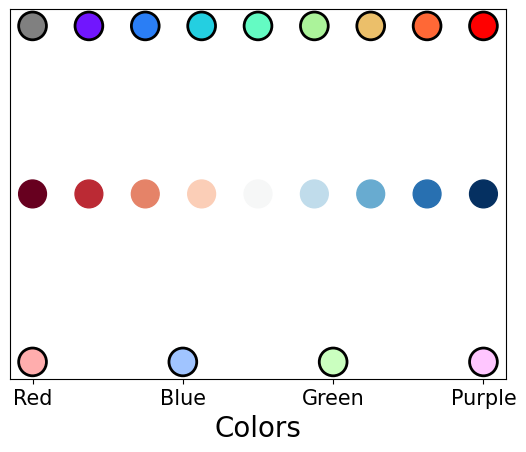

In [4]:
path_to_figures = "./figures/01-BiMod"

os.makedirs(path_to_figures, exist_ok=True)

inch_to_cm = 2.54
cm_to_inch = 1/inch_to_cm

# Red, Blue, Green, Purple
colorpalette = ["#FFADAD", "#A0C4FF", "#CAFFBF", "#FFC6FF"]
palette_rgb = [to_rgb(color) for color in colorpalette]
colors_edges = np.array(["tab:red", "tab:blue", "tab:green", "tab:gray"])
markers = ["s", "o", "D", "^"]

# Defining edge alphas and connection styles
edge_a=.2
edge_cs="arc3,rad=0.2"

from matplotlib.colors import LinearSegmentedColormap
n_samples = 10
#orig_cmap = plt.get_cmap("Spectral", n_samples+1)
orig_cmap = plt.get_cmap("gist_rainbow", n_samples)
orig_cmap = plt.get_cmap("rainbow", n_samples)
#colorlist = ["gray"] + [orig_cmap(i) for i in range(n_samples//2)] + [orig_cmap(n_samples//2+i+1) for i in range(n_samples//2)]
colorlist = ["gray"] + [orig_cmap(i) for i in range(n_samples)]
custom_cmap = LinearSegmentedColormap.from_list("", colorlist)

plt.scatter([0, 1, 2, 3], [0]*4, c=palette_rgb, s=400, edgecolors="k", lw=2)
plt.scatter(np.linspace(0, 3, 9), [0.5]*9, c=np.arange(9), cmap=custom_cmap, s=400, edgecolors="k", lw=2)

plt.scatter(np.linspace(0, 3, 9), [0.25]*9, c=np.arange(9), cmap="RdBu", s=400)

plt.xlabel("Colors", fontsize=20)
plt.xticks([0, 1, 2, 3], ["Red", "Blue", "Green", "Purple"], fontsize=15)

plt.yticks([])

(0.3, 0.6)

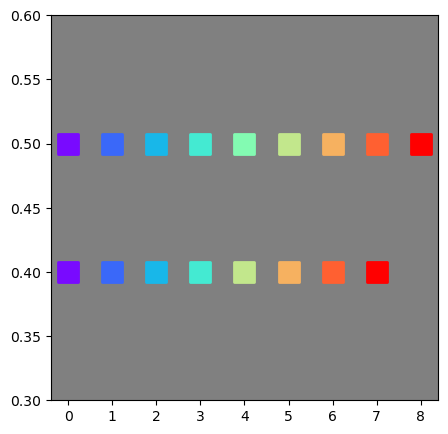

In [5]:
nclust = 9
fig, axes = plt.subplots(figsize=(5, 5))
for i in range(nclust):
    axes.scatter(i, 0.5, color=custom_cmap.resampled(nclust+1)(i+1), s=200, marker="s", lw=2)

axes.set_facecolor("gray")

exclude = [3, 4]
exclude = [4, 5]
exclude = [4]
cluster_colors8 = [custom_cmap.resampled(nclust+1)(i+1) for i in range(nclust) if i not in exclude]

cmap_8clusters = LinearSegmentedColormap.from_list("", ["gray"] + cluster_colors8)

for i in range(8):
    axes.scatter(i, 0.4, color=cluster_colors8[i], s=200, marker="s", lw=2)

axes.set_ylim(0.3, 0.6)

# Figure tentative

$[\mathbf{u}_{0}[i]\,\mathbf{u}_{1}[i]\,\dots\,\mathbf{u}_{N}[i]\,\mathbf{v}_{0}[j]\,\mathbf{v}_{1}[j]\,\dots\,\mathbf{v}_{N}[j]]$
[6 4 2 0 7 5 3 1]


/var/folders/nj/ltrlv15x5jj2jq78pbb2srz80000gn/T/ipykernel_7421/4039787710.py:238: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[4].scatter(com_i - 4*(com_i >= 4), 1-com_i//4, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)


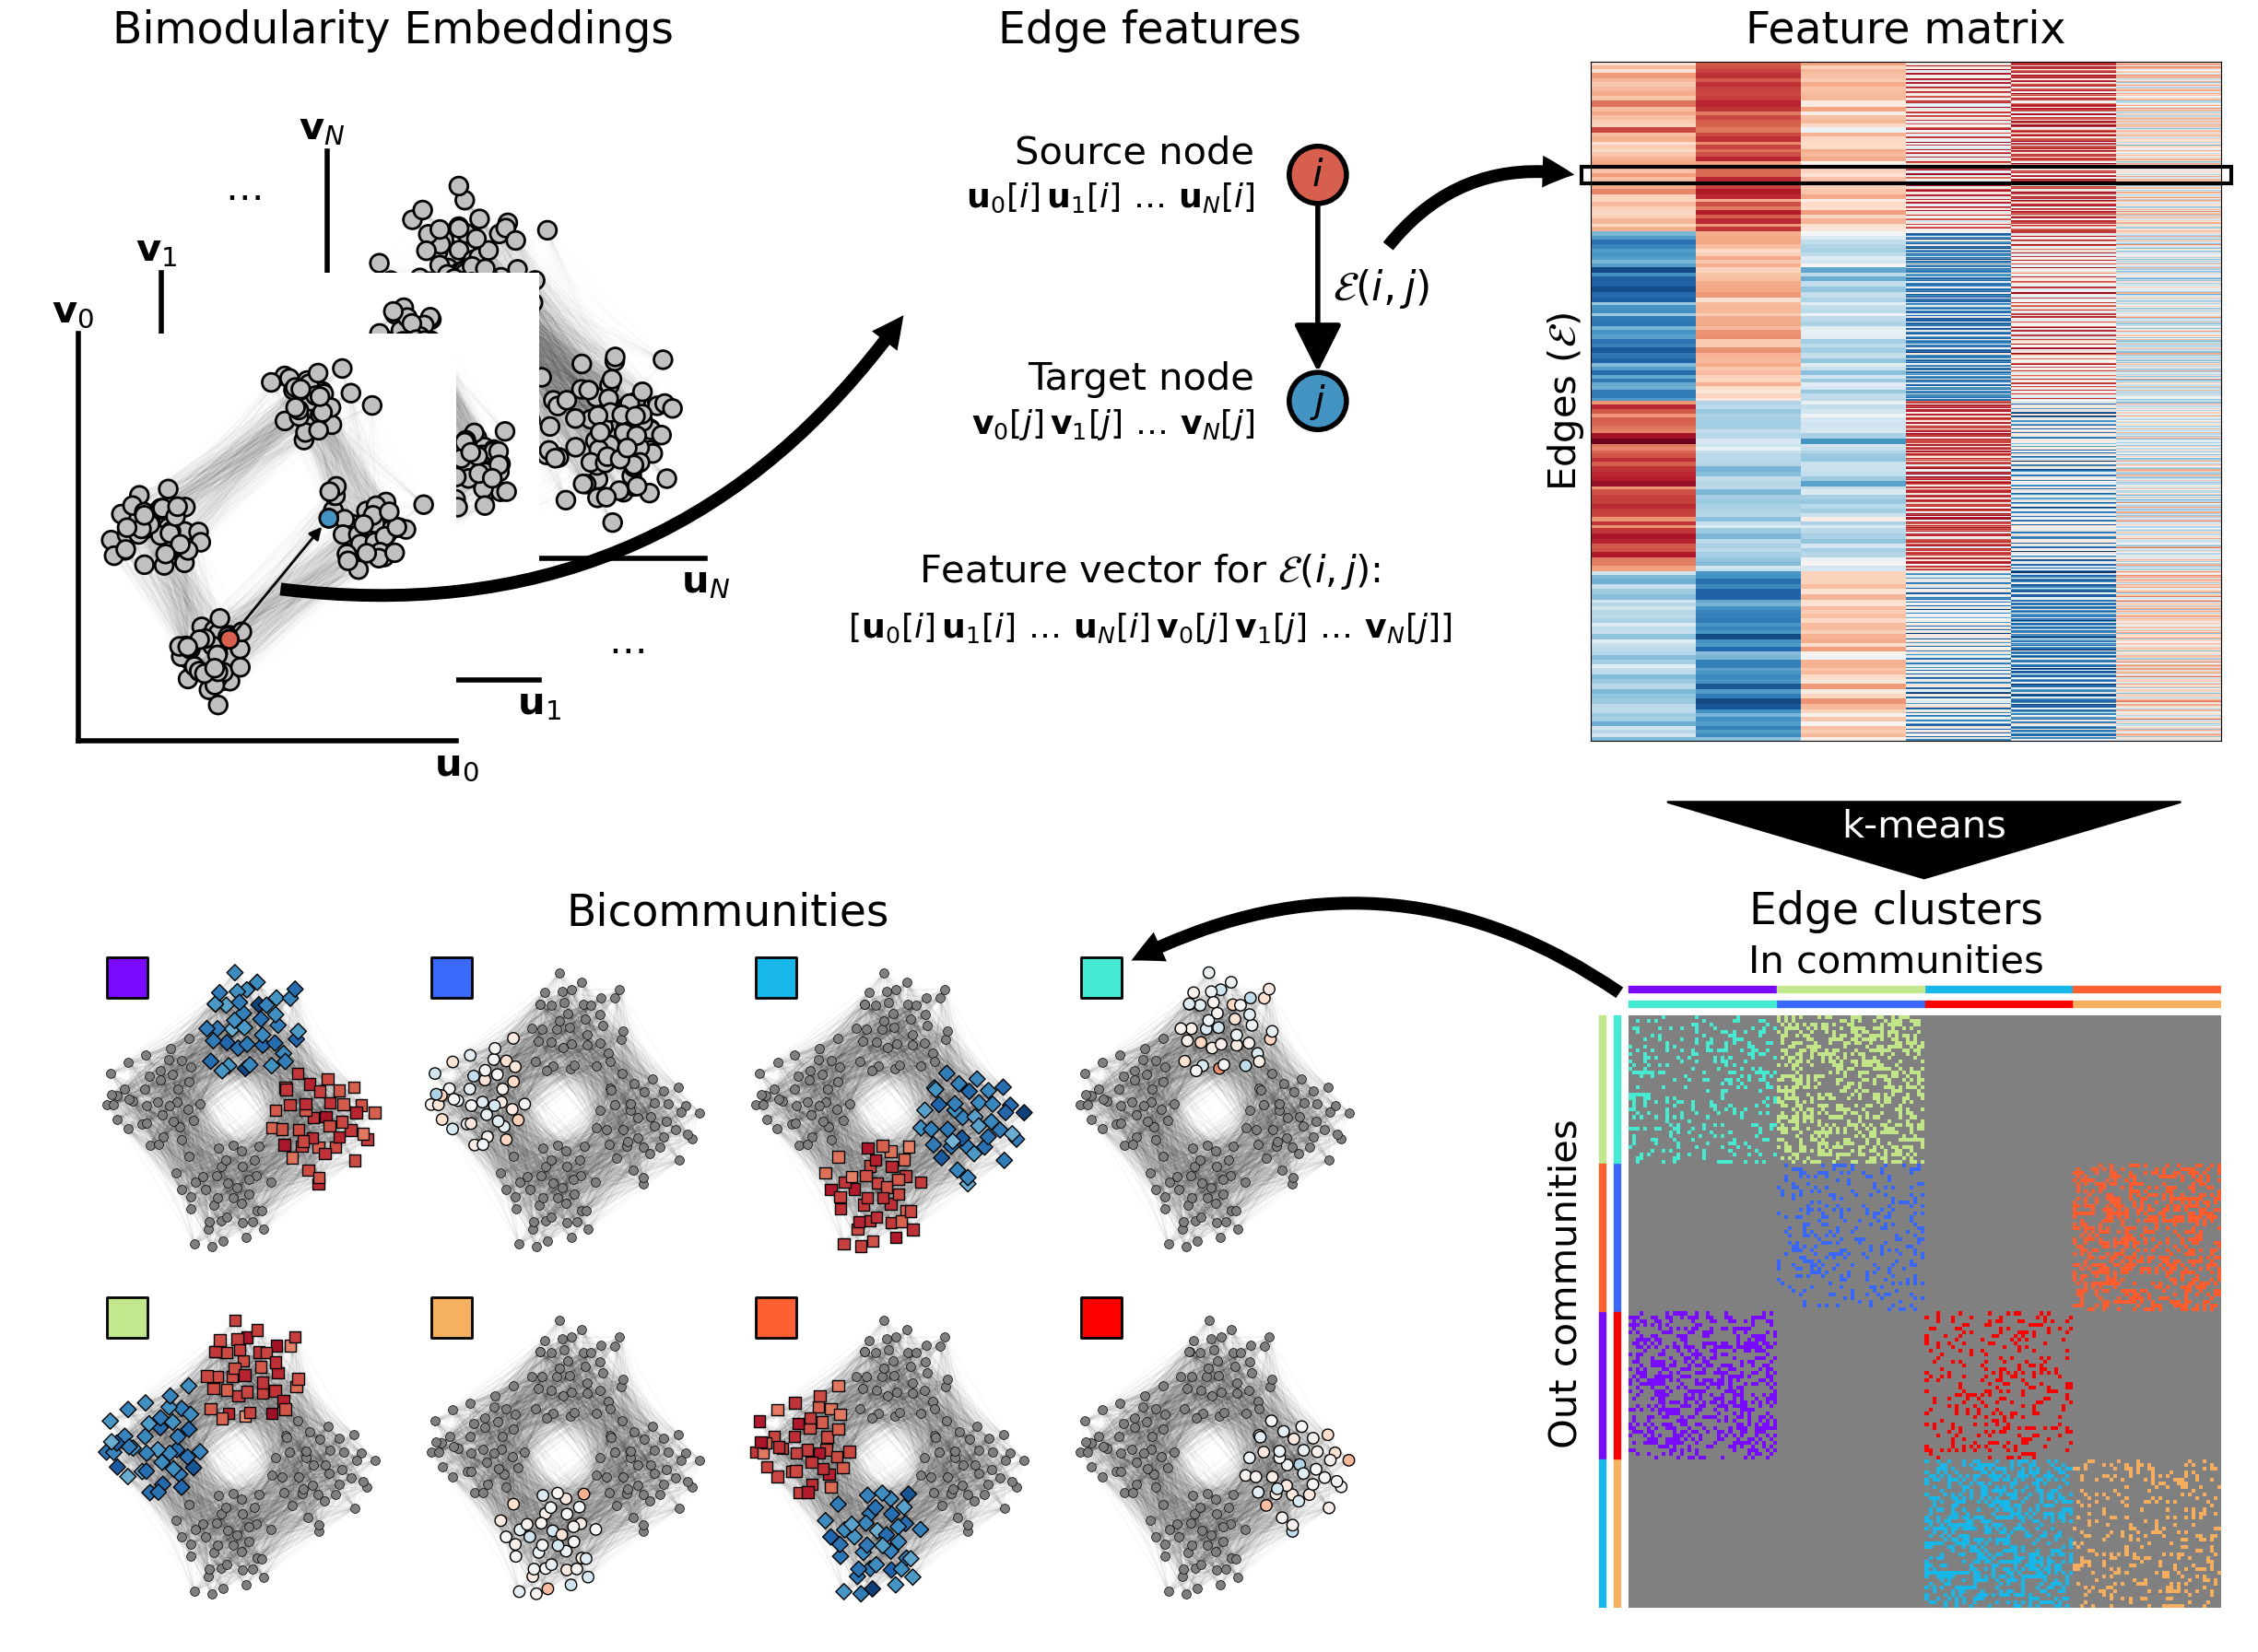

In [6]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

fontscale = 1
stack_param = 0.03
vector_id_max = 3

fig, all_axes = plt.subplots(nrows=2, figsize=(30, 22), gridspec_kw={"hspace":0.3})

for ax in all_axes:
    ax.axis("off")

gs1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=all_axes[0], wspace=0.2) #, width_ratios=[1, 1, 1])
gs2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=all_axes[1], wspace=0.2, width_ratios=[2, 1])

axes = [fig.add_subplot(gs1[0]),
        fig.add_subplot(gs1[1]),
        fig.add_subplot(gs1[2]),
        fig.add_subplot(gs2[1]),
        fig.add_subplot(gs2[0])]

n_per_com = 40
density_value = .4
show_n_eig = 20
fontscale = 1

graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      connect_out_prob=[1, 0, 0.5, 0.5, 1, 0], seed=1234)

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
V = Vh.T

## Bimodularity embeddings
axes[0].set_title("Bimodularity Embeddings", fontsize=34*fontscale, pad=15)
axes[0].axis("off")

pos = axes[0].get_position().bounds

j = vector_id_max - 1
for i in range(vector_id_max+1):
    new_ax = fig.add_axes([pos[0]+stack_param*(vector_id_max-i),
                           pos[1]+stack_param*(vector_id_max-i),
                           pos[2]*0.6, pos[3]*0.6])
    
    if i == 1:
        new_ax.set_xlabel("$\dots$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel("$\dots$", fontsize=30*fontscale, y=1.01, rotation=0)
        new_ax.spines[:].set_visible(False)
        new_ax.set_facecolor("none")
        new_ax.set_xticks([])
        new_ax.set_yticks([])
        continue
    
    selected = [158, 119]
    colors = ["silver"] * len(S)
    #if j == 0:
    #    colors = ["silver" if k != selected[0] else "tab:red" for k in range(len(S))]
    #    colors = [col if k != selected[1] else "tab:blue" for k, col in enumerate(colors)]
    
    new_ax.scatter(U[:, j], V[:, j], s=200, color=colors, edgecolors="k", lw=2, zorder=2)
    #new_ax.scatter(U[:, j], V[:, j], s=200, color="silver", edgecolors="k", lw=2, zorder=2)

    graph_pos = {node_i: (U[node_i, j], V[node_i, j]) for node_i in range(len(S))}
    nx_graph = nx.Graph(graph)
    nx.draw_networkx_edges(nx_graph, pos=graph_pos, alpha=.01)

    if j == 0:
        color_2_nodes = [0.2, 0.8]
        highlight_graph = np.array([[0, 1], [0, 0]])
        new_ax.scatter(U[selected, j], V[selected, j], s=200, c=color_2_nodes, cmap="RdBu", vmin=0, vmax=1, edgecolors="k", lw=2, zorder=4)
    
        graph_pos = {highlight_i: (U[node_i, j], V[node_i, j]) for highlight_i, node_i in enumerate(selected)}
        nx_graph = nx.DiGraph(highlight_graph)
        arrow_list = nx.draw_networkx_edges(nx_graph, pos=graph_pos, alpha=1, width=2, arrowsize=20)

        for arrow in arrow_list:
            arrow.set_zorder(3)

    new_ax.spines[["top", "right"]].set_visible(False)
    #new_ax.spines[["left", "bottom"]].set_linewidth(2)
    new_ax.spines[:].set_linewidth(4)
    new_ax.set_xticks([])
    new_ax.set_yticks([])
    
    if i == 0:
        new_ax.set_xlabel(f"$\mathbf{{u}}_{{N}}$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel(f"$\mathbf{{v}}_{{N}}$", fontsize=30*fontscale, y=1.01, rotation=0)
    else:
        new_ax.set_xlabel(f"$\mathbf{{u}}_{{{j}}}$", fontsize=30*fontscale, x=1)
        new_ax.set_ylabel(f"$\mathbf{{v}}_{{{j}}}$", fontsize=30*fontscale, y=1.01, rotation=0)

    j -= 1

## Edge features (computations)
axes[1].set_title("Edge features", fontsize=34*fontscale, pad=15)
axes[1].spines[:].set_visible(False)

two_nodes_g = nx.DiGraph(np.array([[0, 1], [0, 0]]))
#two_nodes_g_pos = {0: (0, 0), 1: (0.9, 0.9)}
two_nodes_g_pos = {0: (0.8, .92), 1: (0.8, 0.08)}

cmap = plt.get_cmap("RdBu", 5)
axes[1].scatter([0.8, 0.8], [1, 0], s=2000, c=color_2_nodes, cmap="RdBu", vmin=0, vmax=1, edgecolors="k", lw=4, zorder=2)
#axes[1].scatter([0.8, 0.8], [1, 0], s=2000, color="silver", edgecolors="k", lw=4, zorder=1)
nx.draw_networkx_edges(two_nodes_g, pos=two_nodes_g_pos, ax=axes[1], edge_color="k", width=4, arrowsize=80)

axes[1].text(0.8, 1, "$i$", fontsize=30*fontscale, ha="center", va="center")
axes[1].text(0.8, 0, "$j$", fontsize=30*fontscale, ha="center", va="center")

all_u_lab = []
all_v_lab = []
for i, val in enumerate(["0", "1", "...", "N"]):
    if val == "...":
        #lab_u = f"..."
        #lab_v = f"..."
        lab_u = f"$\dots$"
        lab_v = f"$\dots$"
    
        #all_u_lab.append(lab_u)
        #all_v_lab.append(lab_v)
    else:
        lab_u = f"$\mathbf{{u}}_{{{val}}}[i]$"
        lab_v = f"$\mathbf{{v}}_{{{val}}}[j]$"
    
    all_u_lab.append(lab_u[1:-1])
    all_v_lab.append(lab_v[1:-1])

    # axes[1].text(0.4*i-0.5, 1, lab_u, fontsize=30*fontscale, ha="right", va="center")
    # axes[1].text(0.4*i-0.5, 0.3, lab_v, fontsize=30*fontscale, ha="right", va="center")

u_feat = "$"+ "\,".join(all_u_lab) +"$"
v_feat = "$"+ "\,".join(all_v_lab) +"$"
axes[1].text(0.5, 0.9, u_feat, fontsize=26*fontscale, ha="right", va="center")
axes[1].text(0.5, -0.1, v_feat, fontsize=26*fontscale, ha="right", va="center")

axes[1].text(0.5, 1.1, "Source node", fontsize=30*fontscale, ha="right", va="center")
axes[1].text(0.5, 0.1, "Target node", fontsize=30*fontscale, ha="right", va="center")

axes[1].text(1.1, 0.5, "$\mathcal{{E}}(i,j)$", fontsize=32*fontscale, ha="center", va="center")

#feature_vec = r"$[$" + "$;\,$".join(all_u_lab) + "$;$\n" + "$;\,$".join(all_v_lab)+r"$]$"
#axes[1].text(0, -0.75, "Feature vector for $\mathcal{{E}}(i,j)$:\n" + feature_vec , fontsize=26*fontscale, ha="center", va="center")

feature_vec = r"$[" + "\,".join(all_u_lab+all_v_lab) + r"]$"
axes[1].text(0, -0.75, "Feature vector for $\mathcal{{E}}(i,j)$:", fontsize=30*fontscale, ha="center", va="center")
print(feature_vec)
axes[1].text(0, -1, feature_vec, fontsize=26*fontscale, ha="center", va="center")

axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)

## Edge features (clustering)
axes[2].set_title("Feature matrix", fontsize=34*fontscale, pad=15)

scale_factor = S**2/(S**2).sum()
assign = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max], assign_only=True)

maxval = np.max(np.abs(assign))
axes[2].imshow(assign, aspect="auto", vmin=-maxval, vmax=maxval, cmap="RdBu_r", interpolation="none")

xticklabels = ([f"$\mathbf{{u}}_{{{i}}}$" for i in range(vector_id_max-1)] + 
               [f"$\mathbf{{u}}_{{N}}$"] + 
               [f"$\mathbf{{v}}_{{{i}}}$" for i in range(vector_id_max-1)] + 
               [f"$\mathbf{{v}}_{{N}}$"]) 
#axes[2].set_xticks(np.arange(vector_id_max*2), labels=xticklabels, fontsize=30*fontscale)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_ylabel("Edges ($\mathcal{{E}}$)", fontsize=30*fontscale)

axes[3].set_title("Edge clusters", fontsize=34*fontscale, pad=15)

edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max])
sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

n_clusters = np.max(edge_clusters)

cmap_to_use = cmap_8clusters
#axes[3].imshow(edge_clusters_mat, cmap="tab20", interpolation="none", vmin=0, vmax=20)
axes[3].imshow(edge_clusters_mat, cmap=cmap_to_use, interpolation="none", vmin=0, vmax=8)

#for com_i, (send, receive) in enumerate(zip(sending_communities, receiving_communities)):
for com_i in range(n_clusters):
    send = (edge_clusters_mat == com_i+1).sum(axis=1) > 0
    receive = (edge_clusters_mat == com_i+1).sum(axis=0) > 0

    plot_send = (np.where(send)[0].min(), np.where(send)[0].max())
    plot_receive = (np.where(receive)[0].min(), np.where(receive)[0].max())

    if plot_send == plot_receive:
        axes[3].plot([-3-0.5, -3-0.5], [plot_send[0]+0.5, plot_send[1]-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [-3-0.5, -3-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        #axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [len(edge_clusters_mat)+3-0.5, len(edge_clusters_mat)+3-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
    else:
        axes[3].plot([-7-0.5, -7-0.5], [plot_send[0]+0.5, plot_send[1]-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [-7-0.5, -7-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
        #axes[3].plot([plot_receive[0]+0.5, plot_receive[1]-0.5], [len(edge_clusters_mat)+7-0.5, len(edge_clusters_mat)+7-0.5], color=cmap_to_use.resampled(9)(com_i+1), lw=6)
    
    
#axes[3].plot([-1.5, -1.5], [-0.5, n_per_com-0.5], "k", lw=4)

# axes[3].set_xticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=18)
# axes[3].set_yticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=18)

axes[3].set_xlabel("In communities", fontsize=30*fontscale, labelpad=-10)
axes[3].xaxis.set_label_position('top') 
axes[3].set_ylabel("Out communities", fontsize=30*fontscale, labelpad=-10)

axes[3].set_xticks([])
axes[3].set_yticks([])

axes[3].spines[:].set_visible(False)

axes[4].set_title("Bicommunities", fontsize=34*fontscale, pad=15)
axes[4].set_facecolor("none")

bimod = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities, scale=True)

sorted_id = np.flip(np.argsort(bimod))

#titles = [f"$Q_{{E}}(C_{{{i+1}}})={bimod[i]:1.2f},\,Q_{{N}}(C_{{{i+1}}})={bimod_node[i]:1.2f}$" for i in range(n_clusters)]
titles = [f"$Q_{{q}}(C_{{{i+1}}})={bimod[i]:1.2f}$" for i in range(n_clusters)]
titles = np.array(titles)[sorted_id]

print(sorted_id)
sorted_id = np.arange(n_clusters)
reorder_id = [3, 2, 1, 0, 7, 6, 5, 4]

g_nx = nx.DiGraph(graph)
graph_pos = nx.spring_layout(g_nx)

dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_id],
                               receiving_communities[sorted_id], nrows=2, draw_legend=False,
                               fig=fig, axes=axes[4], layout="", titles=[""*n_clusters], edge_alpha=0.03)

for com_i in range(n_clusters):
    axes[4].scatter(com_i - 4*(com_i >= 4), 1-com_i//4, s=1000, c=cmap_to_use.resampled(9)(com_i+1), marker="s", edgecolors="k", lw=2, zorder=3)

axes[4].set_xlim(-0.15, 3.85)
axes[4].set_ylim(-0.9, 1.1)

#ax_arrows = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor="none")
ax_arrows = fig.add_axes([0.1, 0.1, 0.81, 0.8], facecolor="none")
ax_arrows.axis("off")

arrowscolor = "k"
for arrow_pos in [
    #(0.35, 0.75, 0.04, 0, ""),
    #(0.65, 0.75, 0.04, 0, ""),
    (0.855, 0.52, 0, -0.05, "k-means"),
    #(0.69, 0.22, -0.04, 0, "")
    ]:
    x_start, y_pos, x_size, y_size, text = arrow_pos

    arrow = FancyArrowPatch((x_start, y_pos), (x_start+x_size, y_pos+y_size), mutation_scale=100, facecolor=arrowscolor, linewidth=2, arrowstyle=ArrowStyle("wedge", tail_width=4, shrink_factor=0.5))
    if text != "":
        textcolor = "k"
        if arrowscolor == "k":
            textcolor = "w"
        ax_arrows.text(x_start+x_size/2, y_pos+y_size/3, text, color=textcolor, fontsize=30*fontscale, ha="center", va="center")

    ax_arrows.add_patch(arrow)

for arrow_pos in [
    (0.12, 0.65, 0.4, 0.82, "0.3"),
    (0.615, 0.86, 0.7, 0.905, "-0.3"),
    (0.72, 0.4, 0.5, 0.42, "0.3"),
    ]:
    x_start, y_start, x_stop, y_stop, rad = arrow_pos

    #arrow = FancyArrowPatch((x_start, y_pos), (x_start+x_size, y_pos+y_size), mutation_scale=100, facecolor="silver", linewidth=2, arrowstyle=ArrowStyle("wedge", tail_width=4, shrink_factor=0.5))
    arrow = FancyArrowPatch((x_start, y_start), (x_stop, y_stop), mutation_scale=50, facecolor=arrowscolor, linewidth=0, connectionstyle=f"arc3,rad={rad}", arrowstyle=ArrowStyle("simple"))

    ax_arrows.add_patch(arrow)

rectangle_highlight = Rectangle((0.702, 0.9), 0.29, 0.01, edgecolor=arrowscolor, facecolor="none", lw=3)
ax_arrows.add_patch(rectangle_highlight)

fig.savefig(op.join(path_to_figures, "Figure-03-BicommunityDetection-v00-600dpis.png"), dpi=600, bbox_inches="tight")

# Detection methods

Running silhouette analysis for k = 2 to 10 ...
Best average silhouette_score is : 0.70 for K=8


(<Figure size 2400x800 with 10 Axes>, <Axes: >)

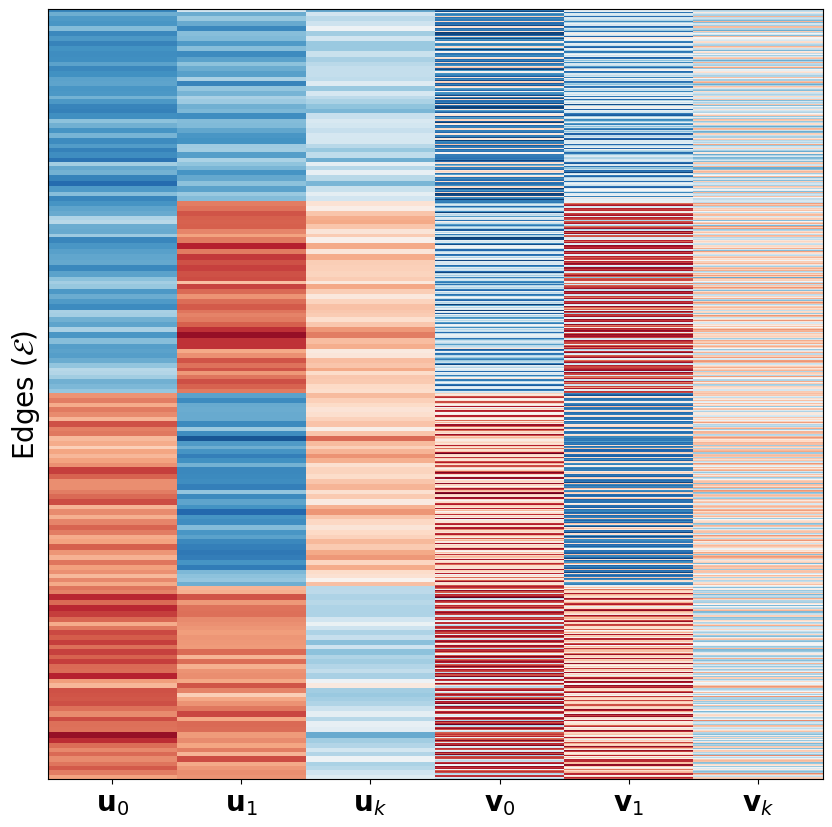

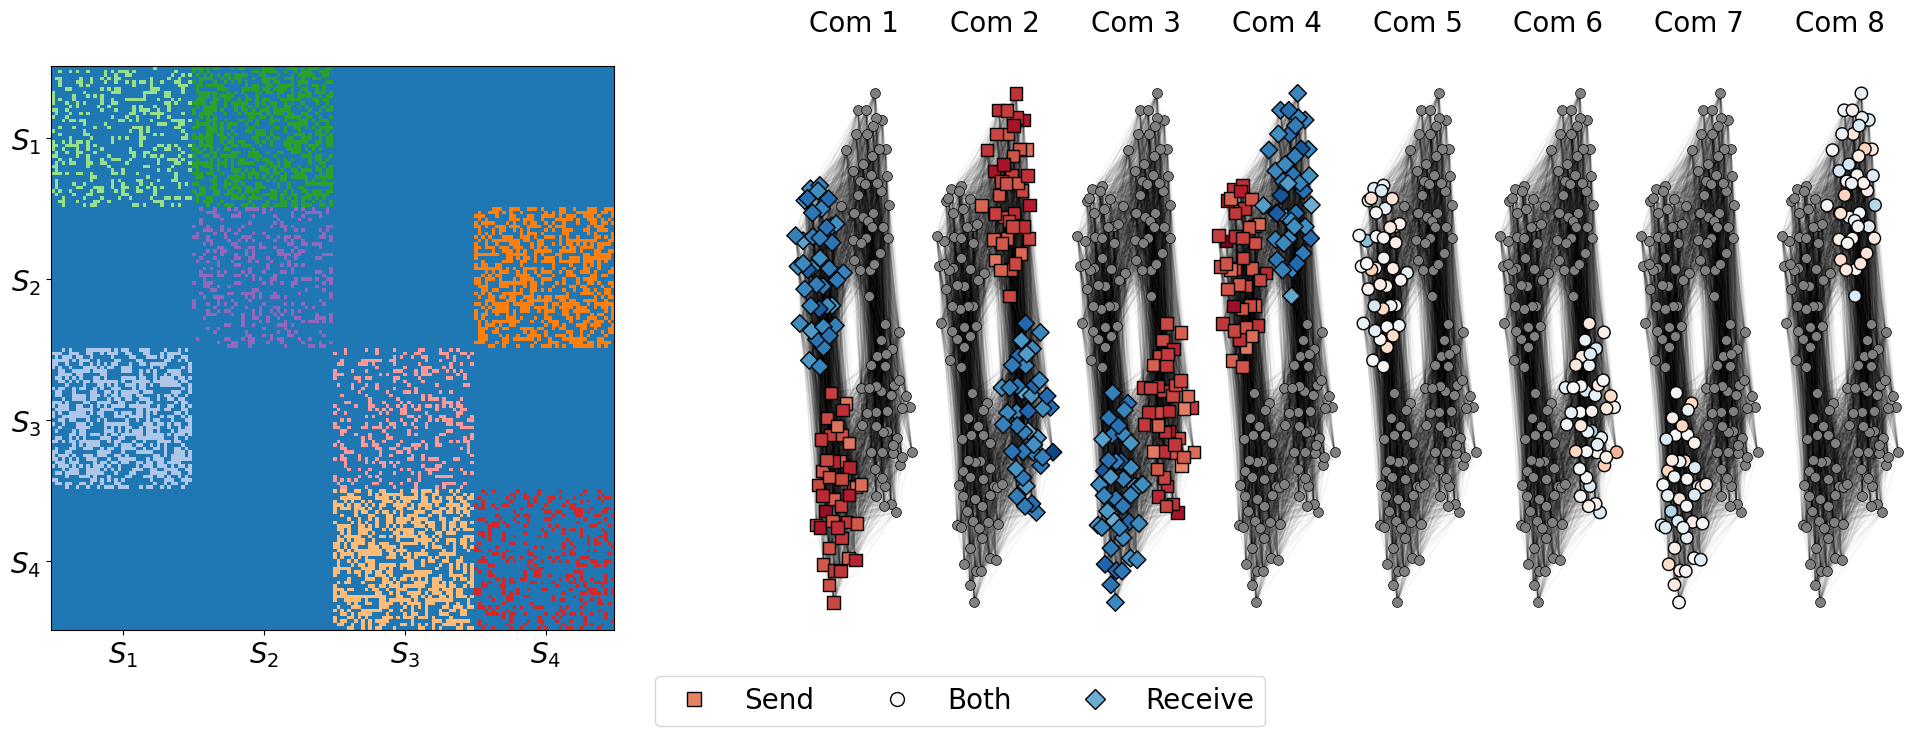

In [7]:
importlib.reload(dgsp)

n_per_com = 40
density_value = .5
show_n_eig = 20
fontscale = 1

n_ideal_dir = 0
vector_id = 0

# Building the graph
graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      connect_out_prob=[1-n_ideal_dir, 0+n_ideal_dir, 0.5, 0.5, 1-n_ideal_dir, 0+n_ideal_dir], seed=1234)

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
V = Vh.T

n_nodes = graph.shape[0]

vector_id_max = 3

scale_factor = S**2/(S**2).sum()

assign = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, scale_S=scale_factor[:vector_id_max], assign_only=True)
#assign = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=8, assign_only=True)

fig, axes = plt.subplots(figsize=(10, 10))

maxval = np.max(np.abs(assign))
axes.imshow(assign, aspect="auto", vmin=-maxval, vmax=maxval, cmap="RdBu_r", interpolation="none")

xticklabels = ([f"$\mathbf{{u}}_{{{i}}}$" for i in range(vector_id_max-1)] + 
               [f"$\mathbf{{u}}_{{k}}$"] + 
               [f"$\mathbf{{v}}_{{{i}}}$" for i in range(vector_id_max-1)] + 
               [f"$\mathbf{{v}}_{{k}}$"]) 
axes.set_xticks(np.arange(vector_id_max*2), labels=xticklabels, fontsize=20)
axes.set_yticks([])
axes.set_ylabel("Edges ($\mathcal{{E}}$)", fontsize=20)

edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=None, scale_S=scale_factor[:vector_id_max])
n_clusters = np.max(edge_clusters)

sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

fig, axes = plt.subplots(ncols=2, figsize=(24, 8), gridspec_kw={"width_ratios": [1, 2]})

# Edge colors
graph_pos = {i: (U[i, vector_id], V[i, vector_id]) for i in range(n_nodes)}
labels = {i: "" for i in range(n_nodes)}

edge_list = nx.DiGraph(graph).edges()

axes[0].imshow(edge_clusters_mat, cmap="tab20", interpolation="none", vmin=0, vmax=20)
axes[0].set_xticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=20)
axes[0].set_yticks(np.arange(4)*n_per_com+n_per_com//2, labels=[f"$S_{{{i+1}}}$" for i in range(4)], fontsize=20)

dgsp_plot.plot_all_bicommunity(graph, sending_communities, receiving_communities, fig=fig, axes=axes[1], layout="")

#fig.savefig(op.join(path_to_figures, "001-bicommunities-toy.png"), bbox_inches="tight")

8 8


(<Figure size 4000x500 with 9 Axes>, <Axes: >)

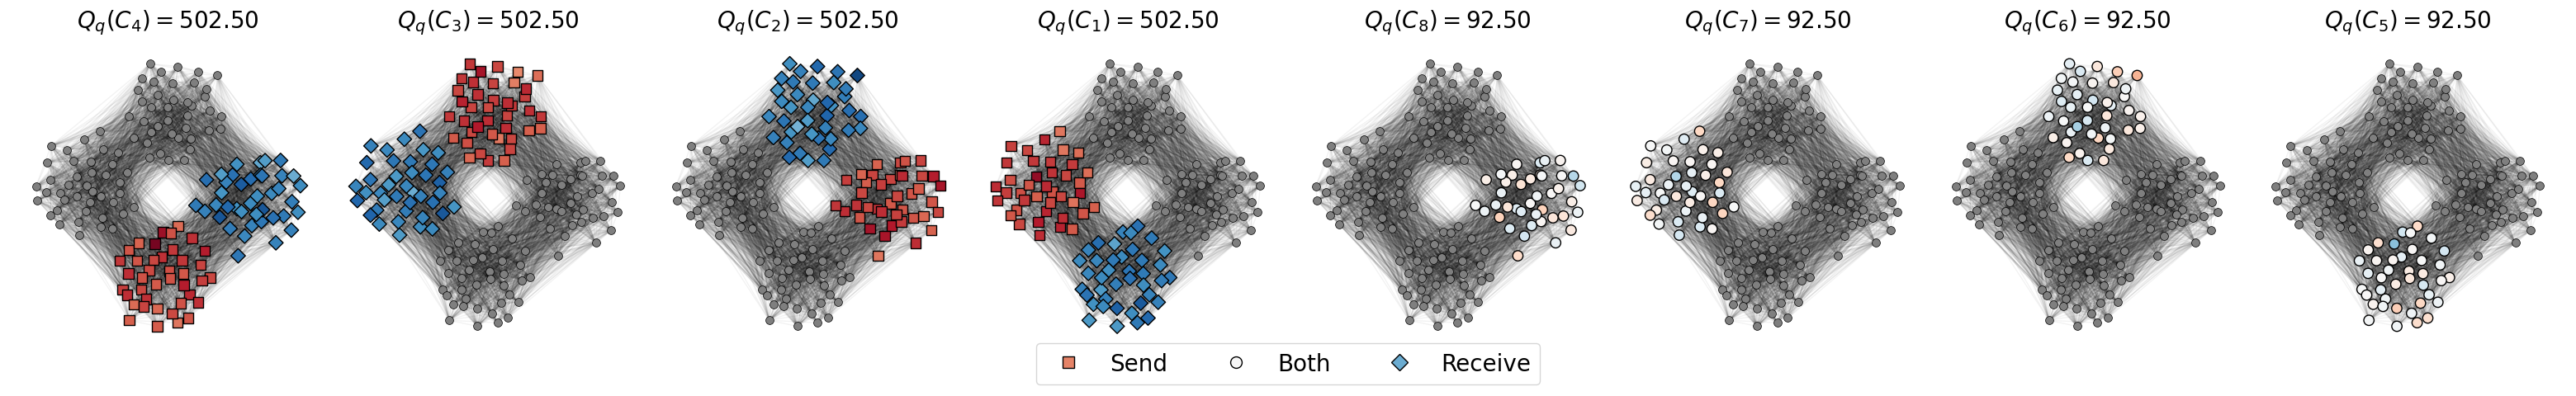

In [8]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

sum_power = 2

fig, axes = plt.subplots(figsize=(5*len(sending_communities), 5))

bimod = dgsp.bimod_index_edges(graph, edge_clusters_mat)
bimod_node = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities)
bimod_quad = dgsp.bimod_index_quad(graph, sending_communities, receiving_communities)

bimod_sqrd = bimod**sum_power/np.sum(bimod**sum_power)
bimod_node_sqrd = bimod_node**sum_power/np.sum(bimod_node**sum_power)
bimod_quad_sqrd = bimod_quad**sum_power/np.sum(bimod_quad**sum_power)

print(n_clusters, len(bimod))

sorted_id = np.flip(np.argsort(bimod_node_sqrd))

#titles = [f"$Q_{{E}}(C_{{{i+1}}})={bimod[i]:1.2f},\,Q_{{N}}(C_{{{i+1}}})={bimod_node[i]:1.2f}$" for i in range(n_clusters)]
titles = [f"$Q_{{q}}(C_{{{i+1}}})={bimod_node[i]:1.2f}$" for i in range(n_clusters)]
titles = np.array(titles)[sorted_id]
dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_id],
                               receiving_communities[sorted_id],
                               fig=fig, axes=axes, layout="", titles=titles)

#fig.savefig(op.join(path_to_figures, "002-bicommunities-toy-graph.png"), bbox_inches="tight")

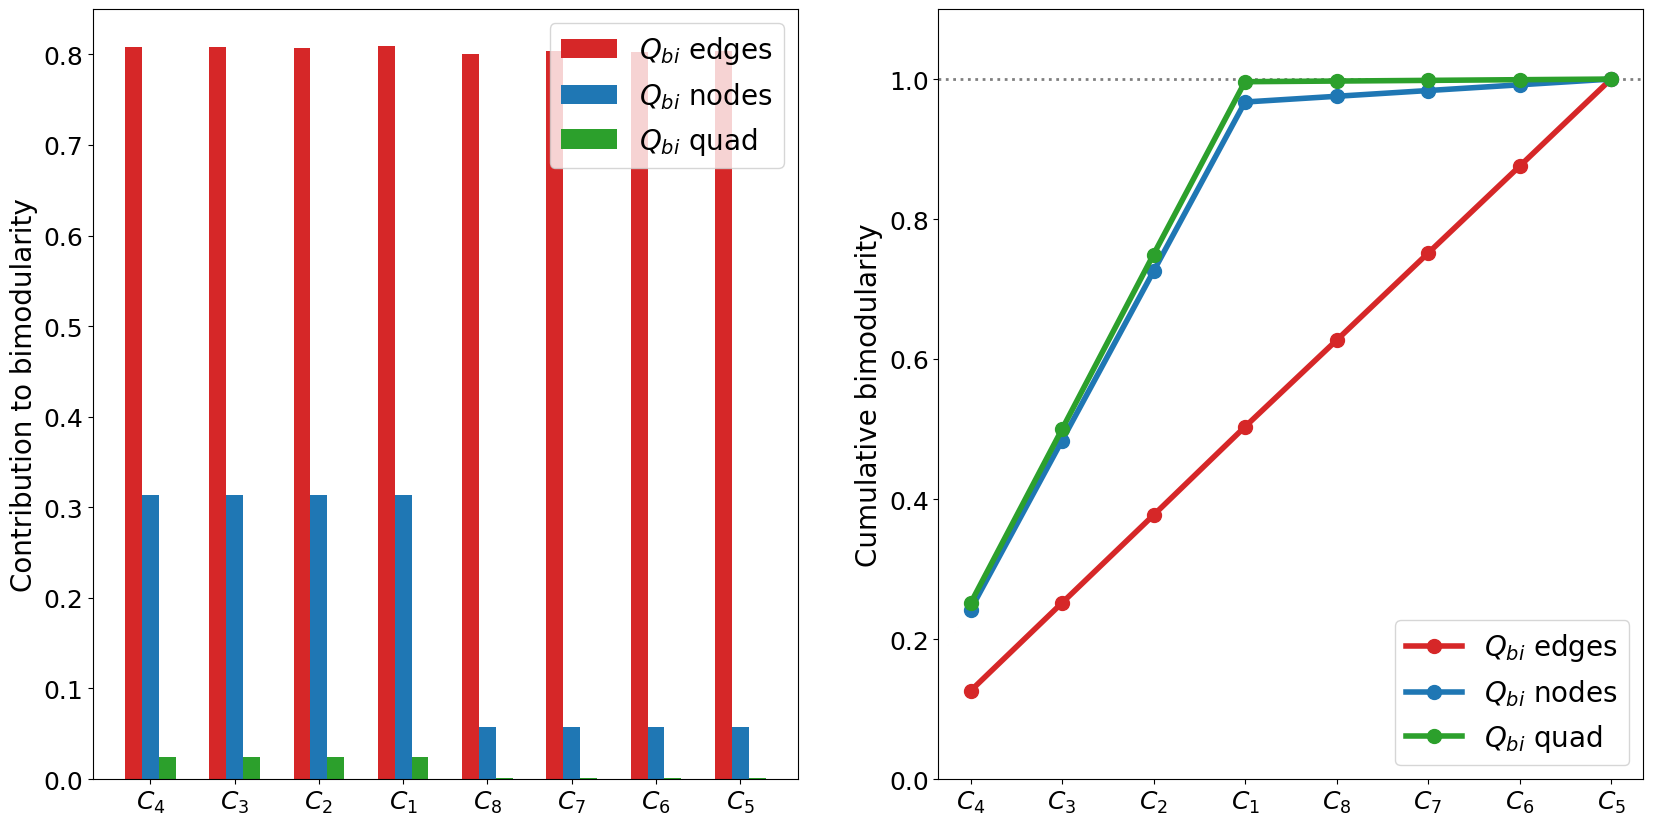

In [9]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

fig, axes = plt.subplots(figsize=(20, 10))
dgsp_plot.plot_all_bimod_indices(graph, edge_clusters_mat,
                             sending_communities,
                             receiving_communities,
                             fig=fig, axes=axes, scale_indices=True)

fig.savefig(op.join(path_to_figures, "003-bicommunities-toy-indices.png"), bbox_inches="tight")

# Stochastic detection

/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),
/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),
/Users/acionca/code/dGSP/dSVD/dgsp.py:415: RuntimeWarning: invalid value encountered in divide
  receiving_communities / np.sum(edge_clusters_mat > 0, axis=0),
/Users/acionca/code/dGSP/dSVD/dgsp.py:415: RuntimeWarning: invalid value encountered in divide
  receiving_communities / np.sum(edge_clusters_mat > 0, axis=0),
/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),


Text(0.5, 0.98, 'Adjusted rand index (10 trials)')

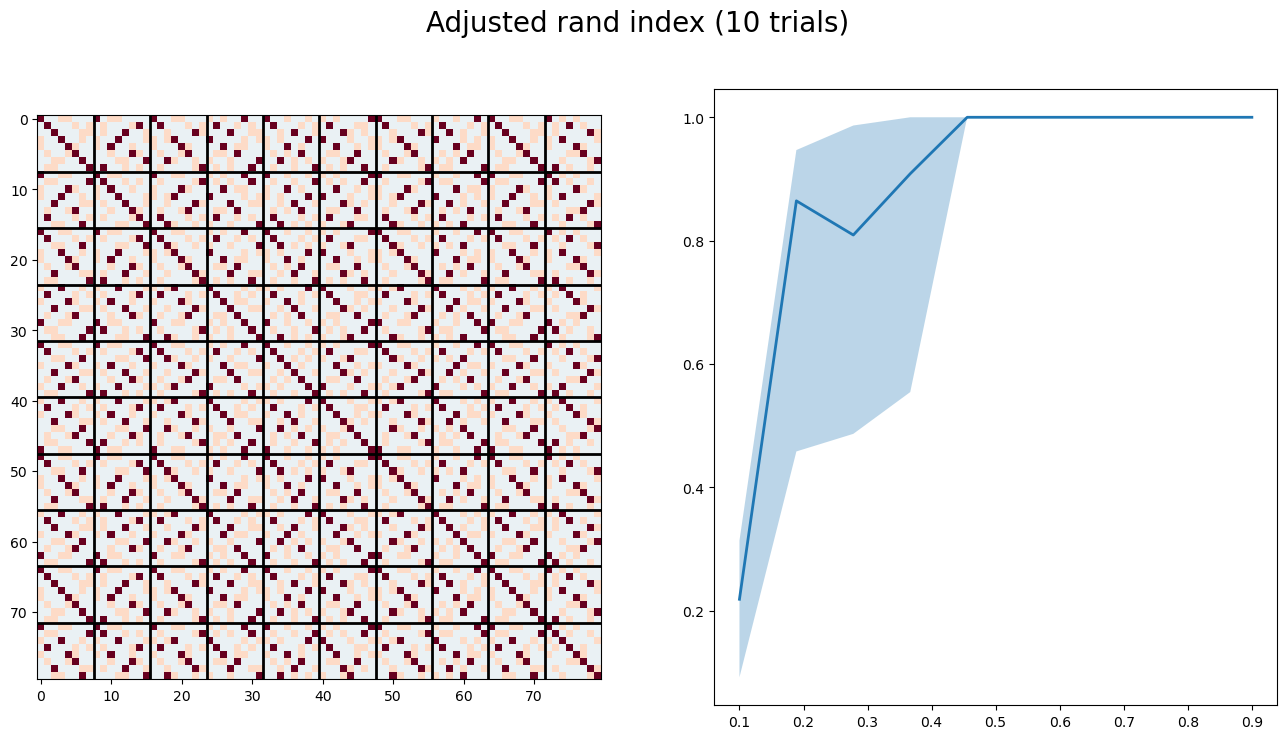

In [10]:
n_trials = 10

#dist.pairwise(X,Y)

density_value = .9
n_ideal_dir = 0
central_asymmetry = 0

vector_id_max = 2
n_kmeans = 8

#fig, axes = plt.subplots(ncols=n_trials, figsize=(16, 8))
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))

if n_trials == 2:
    seeds = [4321, 2405]
    markers = ["o", "s"]
else:
    markers = ["o"] * n_trials
    seeds = [None] * n_trials

all_densities = np.linspace(0.1, 0.9, n_trials)

avg_rand = np.zeros(len(all_densities))
avg_rand = []
triu_idx = np.triu_indices(n_trials, k=1)

for density_i, density_value in enumerate(all_densities):
    all_concat = []
    for trial_i in range(n_trials):
        np.random.seed(seed=seeds[trial_i])

        graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                            connect_density=[
                                                density_value, density_value, 0,
                                                0, density_value,
                                                density_value],
                                            #connect_density=[1, 1, 0, 1, 1, 1],
                                            connect_out_prob=[
                                                1-n_ideal_dir, 0+n_ideal_dir, 0.5-central_asymmetry,
                                                0.5+central_asymmetry, 1-n_ideal_dir,
                                                0+n_ideal_dir])
        
        U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
        V = Vh.T

        edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans", n_kmeans=n_kmeans)
        n_clusters = np.max(edge_clusters)

        sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

        #plot_bicommunity_lines(sending_communities, receiving_communities, axes=axes[trial_i])
        
        concat_com = np.concatenate([sending_communities, -receiving_communities], axis=1).reshape((len(sending_communities), -1)).T

        all_concat.append(concat_com)
        #axes[trial_i].imshow(concat_com, cmap="RdBu", interpolation="none", vmin=-1, vmax=1)

    all_concat = np.concatenate(all_concat, axis=1)
    all_concat[all_concat < 0] = 2

    pairwise_mat = np.zeros((all_concat.shape[1], all_concat.shape[1]))

    for i, concat1 in enumerate(all_concat.T):
        for j, concat2 in enumerate(all_concat.T[i:]):
            #print(i, j, adjusted_rand_score(concat1 > 0, concat2 > 0))
            pairwise_mat[i, i+j] = adjusted_rand_score(concat1 > 0, concat2 > 0)

    pairwise_mat += pairwise_mat.T

    pairwise_trial = np.zeros((n_trials, n_trials))
    for trial_i in range(n_trials):
        for trial_j in range(n_trials-trial_i):

            pairwise_trial[trial_i, trial_i+trial_j] = pairwise_mat[trial_i*n_kmeans:(trial_i+1)*n_kmeans,
                                                                    (trial_i+trial_j)*n_kmeans:(trial_i+trial_j+1)*n_kmeans].max(axis=1).min()
    #pairwise_trial += pairwise_trial.T
    np.fill_diagonal(pairwise_trial, 0)

    #avg_rand[density_i] = pairwise_trial[triu_idx].mean()
    avg_rand.append(pairwise_trial[triu_idx])

axes[0].imshow(pairwise_mat, vmin=-1, vmax=1, cmap="RdBu_r", interpolation="none")

for i in range(1, n_trials):
    axes[0].axvline(i*n_kmeans-0.5, color="k", lw=2)
    axes[0].axhline(i*n_kmeans-0.5, color="k", lw=2)

axes[1].plot(all_densities, np.mean(avg_rand, axis=1), lw=2)
axes[1].fill_between(all_densities,
                     np.max(avg_rand, axis=1),
                     np.min(avg_rand, axis=1),
                     alpha=.3)

# axes[1].imshow(pairwise_trial, vmin=-1, vmax=1, cmap="RdBu_r", interpolation="none")

# axes[1].set_yticks(np.arange(n_trials), labels=[f"{d:1.2f}" for d in all_densities], fontsize=15)

fig.suptitle(f"Adjusted rand index ({n_trials} trials)", fontsize=20)

# C.elegans detection

In [11]:
import data_load
importlib.reload(data_load)

wiring_sym, neuron_df = data_load.load_celegans_graph()

wiring_mod = dgsp.modularity_matrix(wiring_sym, null_model="outin")
print(f"Asymmetric wiring matrix has shape {wiring_sym.shape}")

nodes_labels = neuron_df.loc[:, "Neuron"]
nodes_posx = neuron_df.loc[:, "Position x"]
nodes_posy = neuron_df.loc[:, "Position y"]

d_mat = np.diag(wiring_sym.sum(axis=1))

#U, S, Vh = svd(wiring_mod)
#U, S, Vh = dgsp.sorted_SVD(wiring_mod)
U, S, Vh = dgsp.sorted_SVD(wiring_mod, fix_negative=False)
V = Vh.T

sort_idx = np.flip(np.argsort(S))
S = S[sort_idx]
U = U[:, sort_idx]
V = V[:, sort_idx]

neuron_df

There are 280 neurons in the dataset
All neuron sub-types are:
['SENSORY NEURONS_6' 'SENSORY NEURONS_5' 'SENSORY NEURONS_4'
 'SENSORY NEURONS_3' 'SENSORY NEURONS_2' 'SENSORY NEURONS_1'
 'INTERNEURONS_4' 'INTERNEURONS_3' 'INTERNEURONS_2' 'INTERNEURONS_1'
 'MOTOR NEURONS_HEAD' 'MOTOR NEURONS_SUBLATERAL'
 'MOTOR NEURONS_VENTRAL CORD' 'SEX SPECIFIC_VENTRAL CORD']
Asymmetric wiring matrix has shape (279, 279)


Neuron             Type  Type_num  Position x  Position y
0     ADAL     INTERNEURONS         1    0.011068    0.005903
1     ADAR     INTERNEURONS         1    0.014206    0.002204
2     ADEL  SENSORY NEURONS         0    0.016233    0.005657
3     ADER  SENSORY NEURONS         0    0.014941    0.009308
4     ADFL  SENSORY NEURONS         0    0.082393   -0.000984
..     ...              ...       ...         ...         ...
274   VD05    MOTOR NEURONS         2   -0.314388    0.042732
275   VD06    MOTOR NEURONS         2   -0.405957    0.044258
276   VD07    MOTOR NEURONS         2   -0.488369    0.041206
277   VD08    MOTOR NEURONS         2   -0.596726    0.042732
278   VD09    MOTOR NEURONS         2   -0.688295    0.038154

[279 rows x 5 columns]

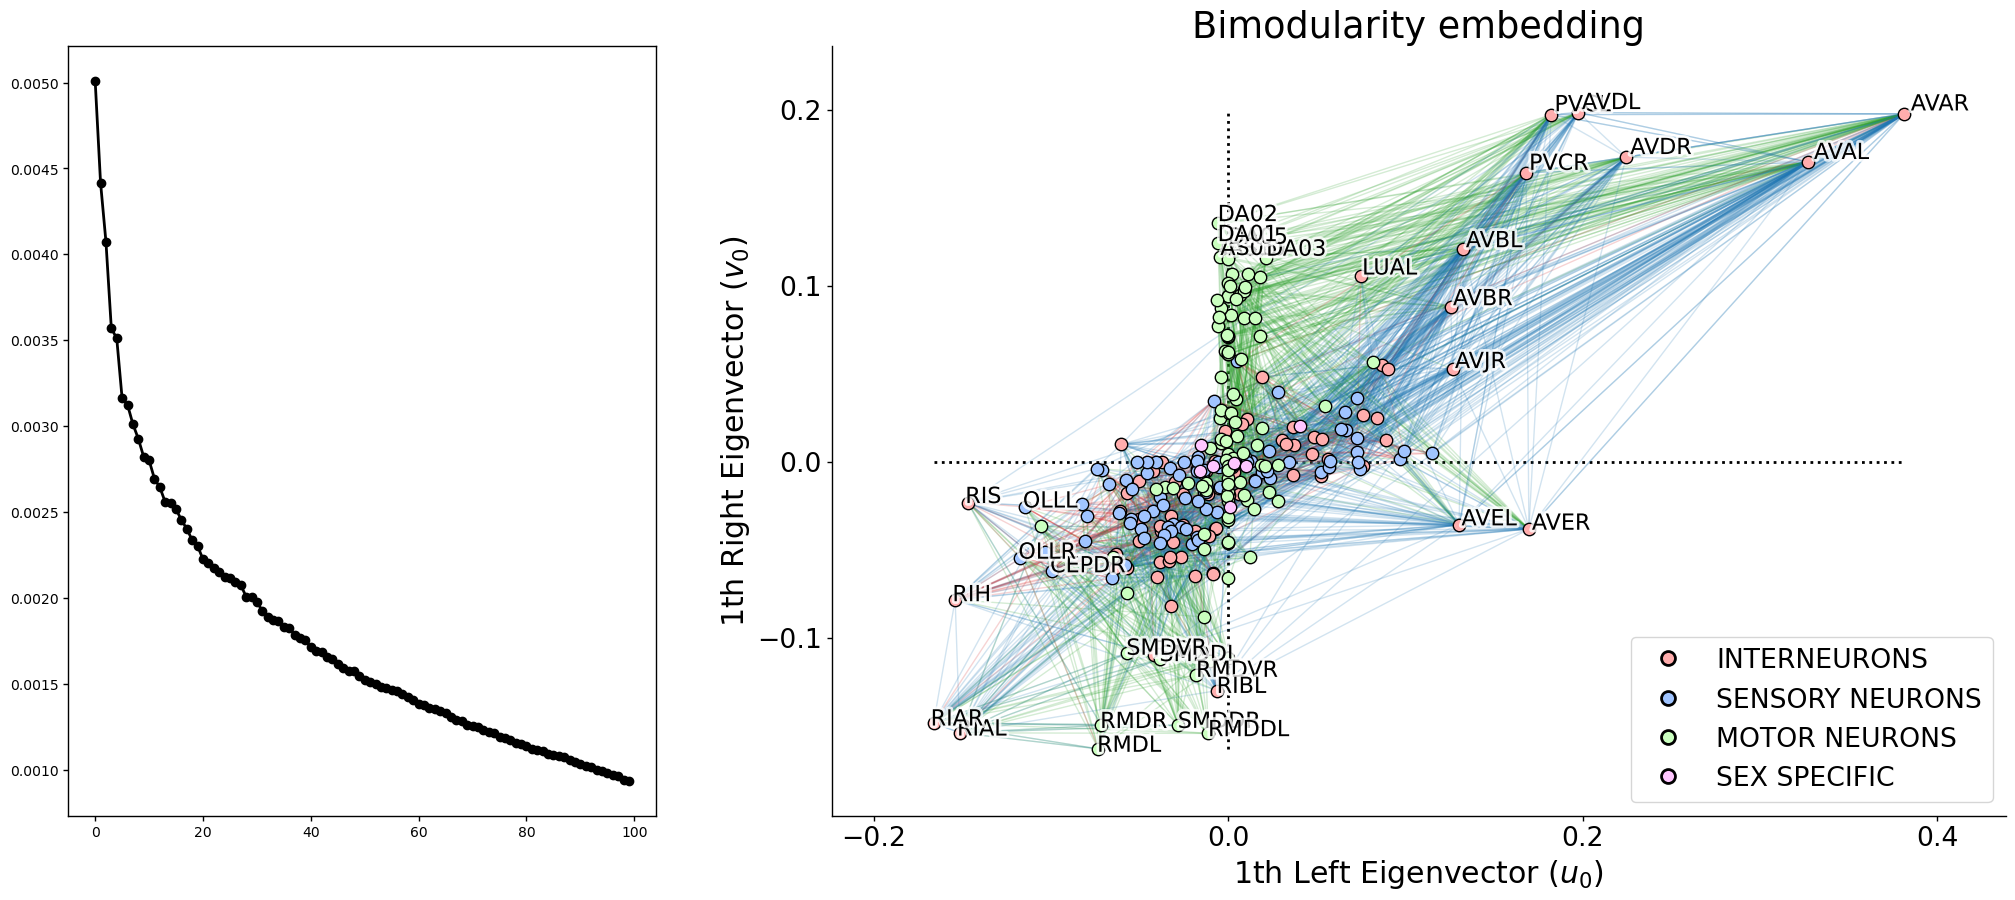

In [12]:
# Composite Figure
from matplotlib.colors import hsv_to_rgb
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.lines import Line2D
from matplotlib.patheffects import withStroke

importlib.reload(plot)

import matplotlib
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1


fontscale = 1.2
alpha_perc = 88
show_markers = True
uneven_ratios = 0.5
eig_id = np.where(S > 1e-10)[0][0]
#eig_id = -1

fig, all_axes = plt.subplots(ncols=2, figsize=(25, 10), gridspec_kw={"width_ratios": [1, 2]})
suffix = "Rect" + "_".join([f"{inch:1.0f}" for inch in fig.get_size_inches()])

axes = all_axes

#################################################################################
###     First plot
#################################################################################

s_scale = S / wiring_sym.sum()
axes[0].plot(s_scale[:100], "-o", lw=2, color="k")

#################################################################################
###     Second plot
#################################################################################
graph = nx.DiGraph(wiring_sym)
graph_pos = {i: (U[i, eig_id], V[i, eig_id]) for i in range(wiring_sym.shape[0])}

edge_colors = np.zeros_like(np.array(graph.edges())[:, 0])

for i, (_, target) in enumerate(graph.edges()):
    edge_colors[i] = neuron_df.loc[target, "Type_num"]
    
colors = palette_rgb

nx.draw_networkx_edges(graph, pos=graph_pos, ax=axes[1], edge_color=colors_edges[edge_colors],
                        alpha=edge_a, edgelist=graph.edges(), arrows=False)

for i, n_type in enumerate(neuron_df["Type"].unique()):
    neurons_in_type = neuron_df.loc[neuron_df["Type"] == n_type, "Neuron"]

    type_mask = np.array([lab in neurons_in_type.values for lab in nodes_labels])
    axes[1].scatter(U[type_mask, eig_id], V[type_mask, eig_id], color=colors[i], s=80, label=n_type,
                    zorder=3, edgecolor="k", lw=1, alpha=1, marker=markers[i])

alpha_factor = 0.2
alpha_threshold = 0.45
squared_rad = U[:, eig_id] ** 2 + V[:, eig_id] ** 2
alpha_vector = squared_rad
alpha_vector = np.clip(alpha_vector/(alpha_vector.max() * alpha_factor), a_min=0, a_max=1)

alpha_vector[alpha_vector < alpha_threshold] = 0
alpha_vector = (squared_rad > np.percentile(squared_rad, alpha_perc)).astype(int)

sorted_by_radius = np.argsort(squared_rad)

#for i, neuron in enumerate(nodes_labels):
for i in sorted_by_radius:
    #if neuron in label_filter:
    if True:
        axes[1].text(1.01*U[i, eig_id], 1.01*V[i, eig_id], nodes_labels[i], fontsize=16, alpha=alpha_vector[i],
                     path_effects=[
                         withStroke(
                             linewidth=4,
                             foreground="w",
                             alpha=0.8*alpha_vector[i],
                             )])

x_max, y_max = np.max(np.vstack([U[:, eig_id], V[:, eig_id]]), axis=1)
x_min, y_min = np.min(np.vstack([U[:, eig_id], V[:, eig_id]]), axis=1)

abs_min = max([x_min, y_min])
abs_max = min([x_max, y_max])

#axes.plot([abs_min, abs_max], [abs_min, abs_max], color="tab:orange")
axes[1].plot([0, 0], [y_min, y_max], ls=":", lw=2, color="k", zorder=0)
axes[1].plot([x_min, x_max], [0, 0], ls=":", lw=2, color="k", zorder=0)

legend_elements = [Line2D([0], [0], color="w", alpha=1, markersize=10, markeredgecolor="k", markerfacecolor=palette_rgb[i],
                          markeredgewidth=2, marker=markers[i], label=type) for i, type in enumerate(neuron_df["Type"].unique())]

# Parameters
axes[1].set_title(f"Bimodularity embedding", fontsize=22 * fontscale)
#axes[1].set_title(f"Bimodularity embedding $s_{{{eig_id+1}}}={S[eig_id]:1.2f}$", fontsize=22 * fontscale)
axes[1].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize=16 * fontscale)
axes[1].set_xticks(np.linspace(-0.2, .4, 4))
axes[1].set_yticks(np.linspace(-.1, .2, 4))
axes[1].set_xlabel(f"{eig_id + 1}th Left Eigenvector ($u_{{{eig_id}}}$)", fontsize=18 * fontscale)
axes[1].set_ylabel(f"{eig_id + 1}th Right Eigenvector ($v_{{{eig_id}}}$)", fontsize=18 * fontscale)
axes[1].spines[["top", "right"]].set_visible(False)
#axes[1].legend(fontsize=16 * fontscale, loc="lower right")
axes[1].legend(handles=legend_elements, fontsize=16 * fontscale, loc="lower right")

Found 5 clusters !


/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),
/Users/acionca/code/dGSP/dSVD/dgsp.py:415: RuntimeWarning: invalid value encountered in divide
  receiving_communities / np.sum(edge_clusters_mat > 0, axis=0),


(<Figure size 2400x800 with 7 Axes>, <Axes: >)

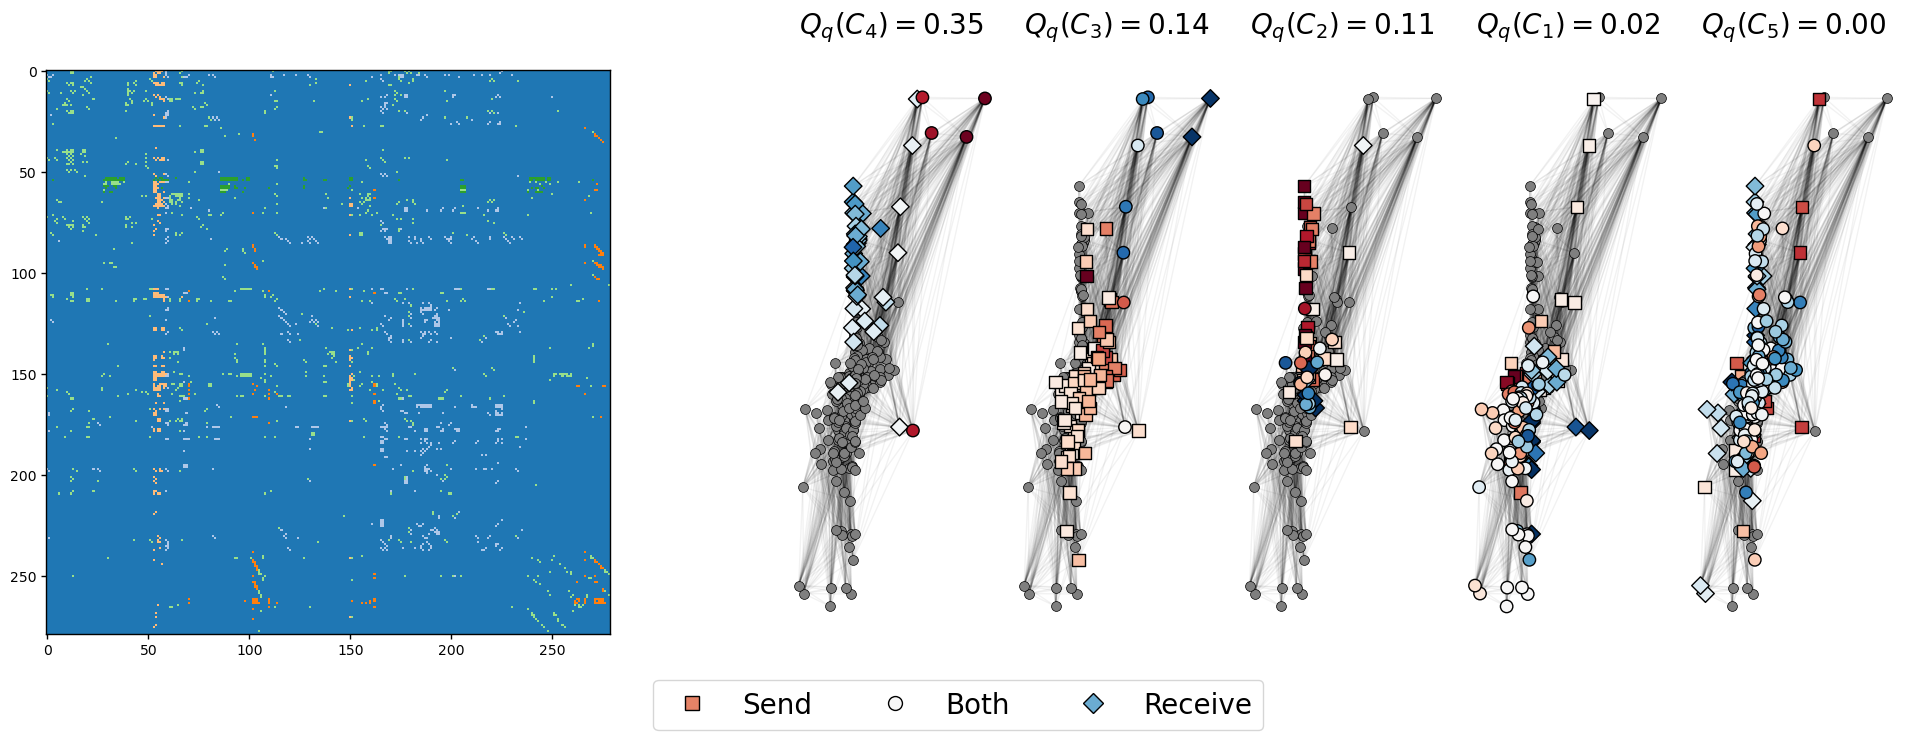

In [13]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

graph = wiring_sym

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
V = Vh.T

n_nodes = graph.shape[0]

#vector_id_max = 4
vector_id_max = 5
n_kmeans = 5

edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans",
                                                           n_kmeans=n_kmeans, verbose=True, max_k=10)
n_clusters = np.max(edge_clusters)

sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

fig, axes = plt.subplots(ncols=2, figsize=(24, 8), gridspec_kw={"width_ratios": [1, 2]})
# Edge colors
#graph_pos = {i: (U[i, vector_id], V[i, vector_id]) for i in range(n_nodes)}
graph_pos = {i: (x, y) for i, (x, y) in enumerate(zip(nodes_posx, nodes_posy))}

edge_list = nx.DiGraph(graph).edges()

axes[0].imshow(edge_clusters_mat, cmap="tab20", interpolation="none", vmin=0, vmax=20)

bimod_quad = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities, scale=True)
#bimod_quad = bimod_quad**sum_power/np.sum(bimod_quad**sum_power)
sorted_by_quad = np.flip(np.argsort(bimod_quad))

titles = [f"$Q_{{q}}(C_{{{i+1}}})={bimod_quad[i]:1.2f}$" for i in range(n_clusters)]
titles = np.array(titles)[sorted_by_quad]
dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_by_quad],
                               receiving_communities[sorted_by_quad], fig=fig, axes=axes[1],
                               scatter_only=False, titles=titles)

(<Figure size 2500x500 with 6 Axes>, <Axes: >)

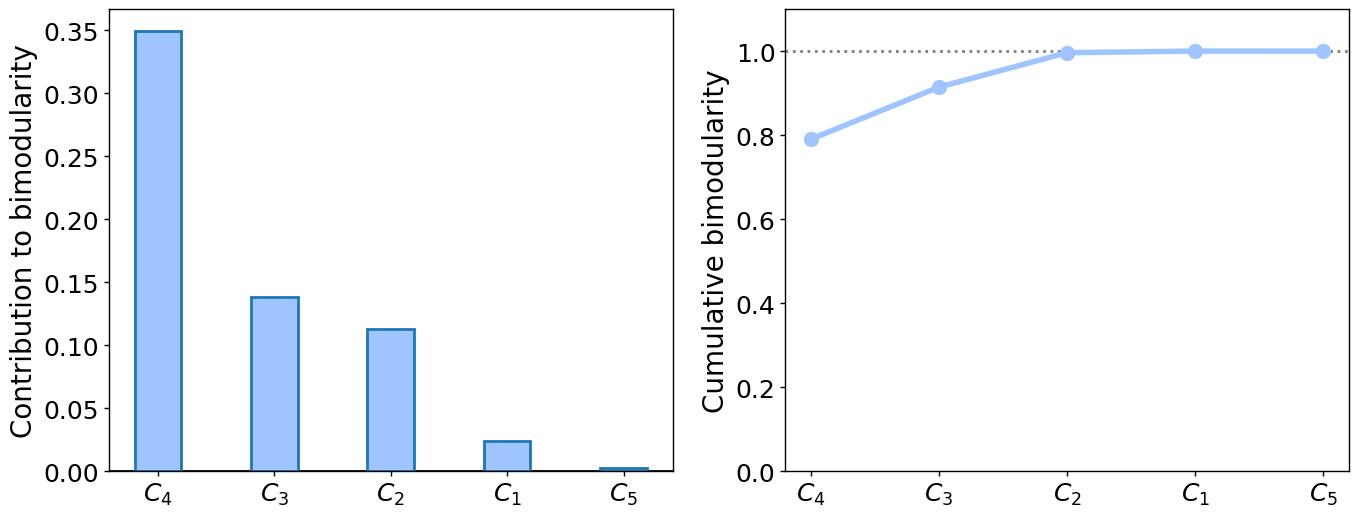

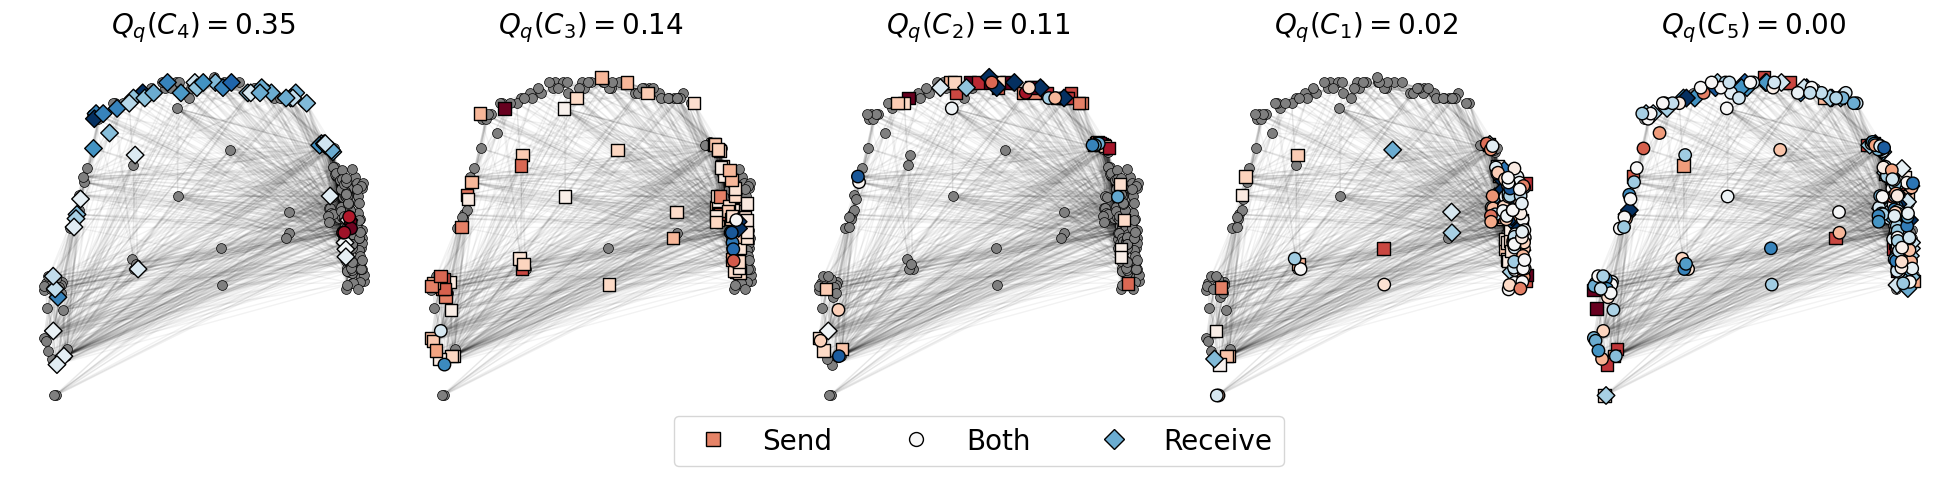

In [14]:
fig, axes = plt.subplots(figsize=(16, 6))
#dgsp_plot.plot_all_bimod_indices(graph, edge_clusters_mat, sending_communities, receiving_communities, fig=fig, axes=axes)

bimod = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities, scale=True)
dgsp_plot.plot_bimod_indices(bimod, fig=fig, axes=axes, color=palette_rgb[1])

fig, axes = plt.subplots(figsize=(5*len(sending_communities), 5))
dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_by_quad],
                               receiving_communities[sorted_by_quad],
                               fig=fig, axes=axes,
                               scatter_only=False, titles=titles, layout=graph_pos)

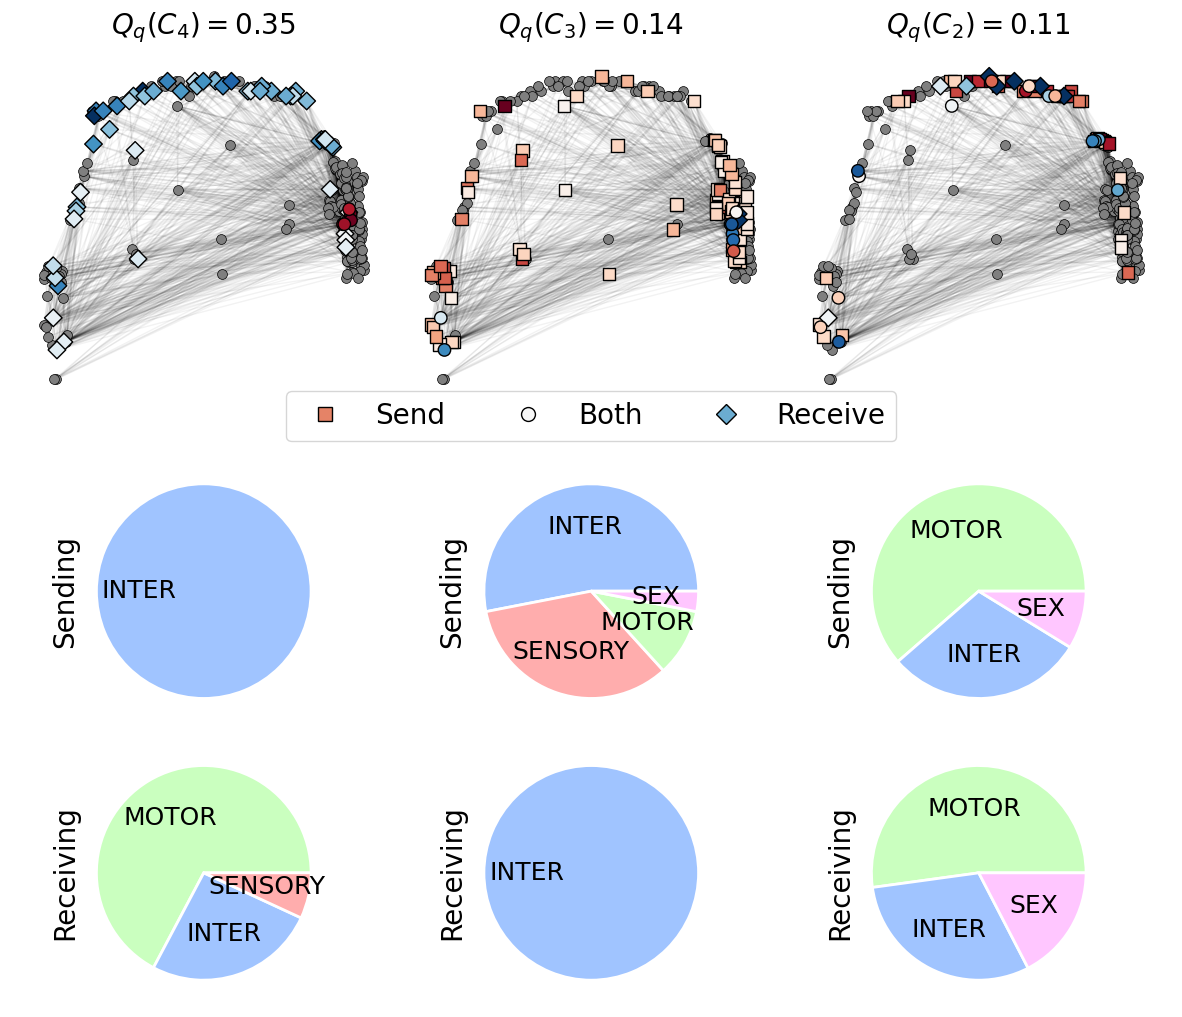

In [100]:
importlib.reload(dgsp_plot)

n_show_comp = 3

#fig, axes = plt.subplots(nrows=2, figsize=(5*len(sending_communities[:n_show_comp]), 12.5),
#                         gridspec_kw={"hspace":0.1, "height_ratios":[2, 3]})
fig, axes = plt.subplots(nrows=2, figsize=(5*len(sending_communities[:n_show_comp]), 12.5),
                         gridspec_kw={"hspace":0.1, "height_ratios":[2, 3]})

for ax in axes:
    ax.axis("off")

dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_by_quad][:n_show_comp],
                               receiving_communities[sorted_by_quad][:n_show_comp],
                               fig=fig, axes=axes[0], legend_on_ax=True,
                               scatter_only=False, titles=titles[:n_show_comp], layout=graph_pos)

true_types = ["SENSORY NEURONS", "INTERNEURONS", "MOTOR NEURONS", "SEX SPECIFIC"]
manual_types = ["SENSORY", "INTER", "MOTOR", "SEX"]

type2lab = {t: l for t, l in zip(true_types, manual_types)}
type_mod = neuron_df.loc[:, "Type"].map(type2lab)

colors = {t: c for t, c in zip(manual_types, palette_rgb)}

pie_gs = GridSpecFromSubplotSpec(1, len(sending_communities[:n_show_comp]), subplot_spec=axes[1], wspace=0, hspace=0)
pie_axes = [fig.add_subplot(pie_gs[i] ) for i in range(len(sending_communities[:n_show_comp]))]
dgsp_plot.plot_bicommunity_types(sending_communities[sorted_by_quad][:n_show_comp],
                       receiving_communities[sorted_by_quad][:n_show_comp], axes=pie_axes, fig=fig,
                       titles=titles, type_colors=colors, fontsize=18,
                       types=type_mod)

fig.savefig(op.join(path_to_figures, f"Figure-04-CelegansBicommunities-Nvec{vector_id_max}k{n_kmeans}-Show{n_show_comp}-v00.png"), dpi=300, bbox_inches="tight")

ValueError: too many values to unpack (expected 2)

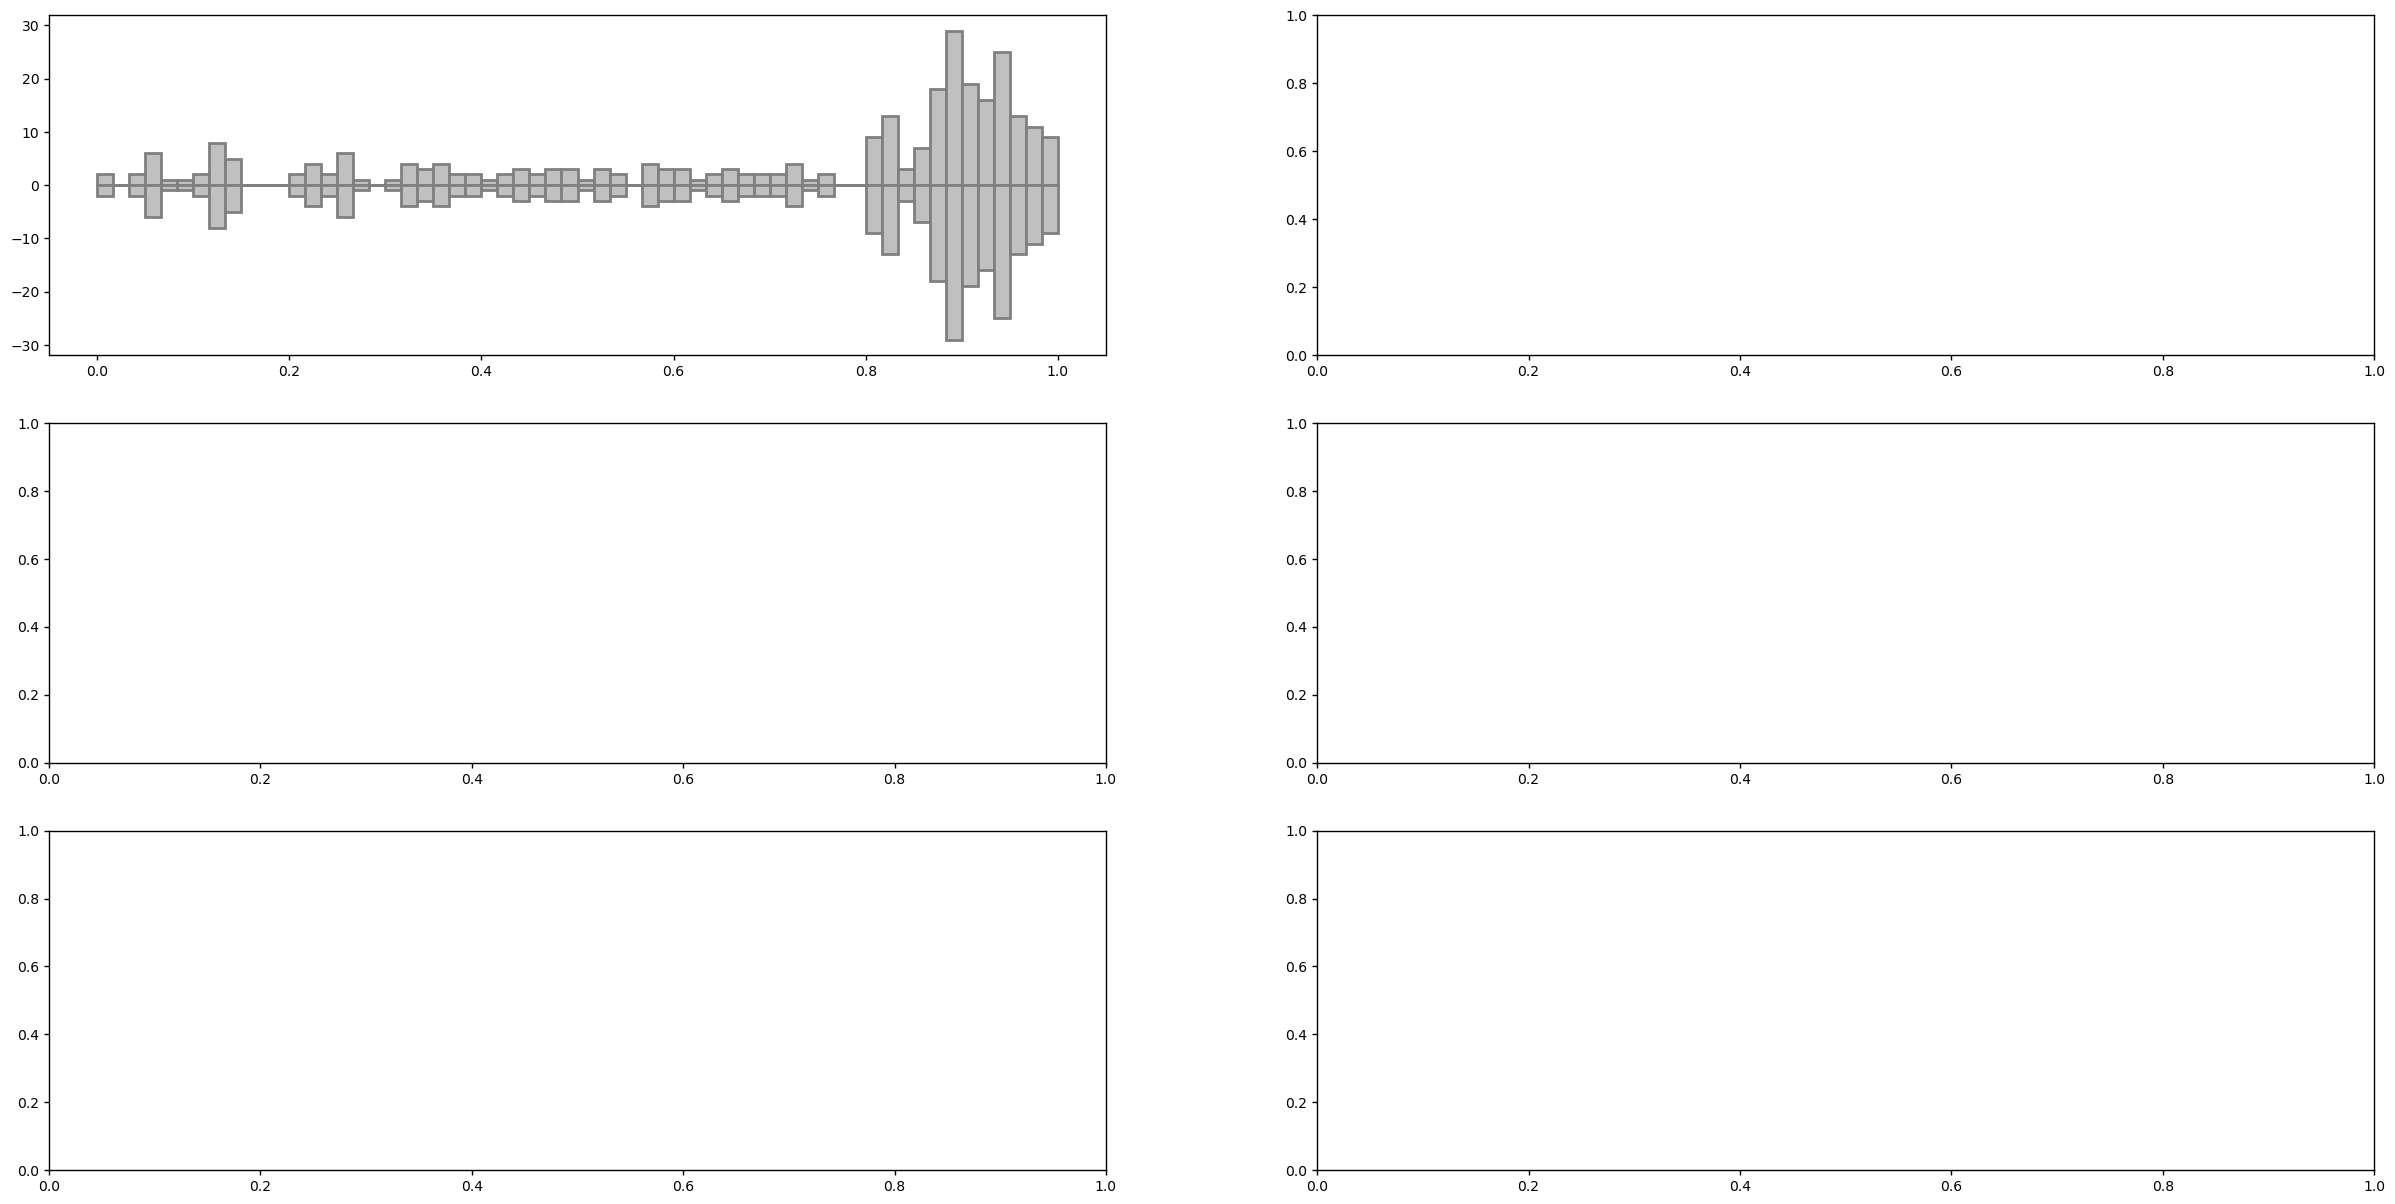

In [90]:
from scipy.interpolate import CubicSpline

x_norm = nodes_posx + 0.4
y_norm = (nodes_posy - nodes_posy.min())

angle = np.arctan2(y_norm/np.abs(y_norm).max(), x_norm/np.abs(x_norm).max())
angle = (angle - angle.min())/(angle.max() - angle.min())

angle = 1 - angle
#ap_angle = n_cmap_points*(ap_angle - ap_angle.min())/(ap_angle.max() - ap_angle.min())

#fig, axes = plt.subplots(figsize=(15, 5))
#axes.scatter(nodes_posx, nodes_posy, c=angle, cmap="rainbow_r", s=100, vmin=0, vmax=1, edgecolors="k", lw=1)

fig, axes = plt.subplots(nrows=n_show_comp, ncols=2, figsize=(30, 15))

n_bins = 60

count_weights = np.ones(n_bins)
count_weights[:47] = 3

for ax_i, com_id in enumerate(sorted_by_quad[:n_show_comp]):

    count, bins, _ = axes[ax_i, 0].hist(angle, bins=n_bins, color="silver", alpha=1, edgecolor="gray", lw=2)
    _, _, _ = axes[ax_i, 0].hist(angle, bins=n_bins, color="silver", alpha=1, edgecolor="gray", lw=2, weights=-np.ones_like(angle))

    count_norm, bins = np.histogram(angle, bins=n_bins)[0]
    
    axes[ax_i, 1].bar(bins[:-1], count_weights*count, width=1/n_bins, color="silver", alpha=1, edgecolor="gray", lw=2)
    axes[ax_i, 1].bar(bins[:-1], -count_weights*count, width=1/n_bins, color="silver", alpha=1, edgecolor="gray", lw=2)

    xx = np.linspace(np.min(bins), np.max(bins), 1000)

    com_label = ["Send", "Receive"]
    mult = [1, -1]
    for com_i, com in enumerate([sending_communities[com_id], receiving_communities[com_id]]):
        fltr_com = com > 0
        count_previous = np.zeros_like(count)

        for i, n_type in enumerate(manual_types):
            #print(n_type)
            neurons_in_type = neuron_df.loc[type_mod == n_type, "Neuron"]
            type_mask = np.array([lab in neurons_in_type.values for lab in nodes_labels])

            mask = np.logical_and(type_mask, fltr_com)

            weights = np.ones_like(angle[mask])

            count_norm, _, _ = axes[ax_i, 0].hist(angle[mask], bins=bins, color=palette_rgb[i], alpha=1, edgecolor="k", lw=2,
                                            weights=mult[com_i]*weights, bottom=count_previous,
                                            label=f"{com_label[com_i]} {n_type}")
            
            count_norm = np.histogram(angle[mask], bins=bins, weights=mult[com_i]*weights)[0]
            
            axes[ax_i, 1].bar(bins[:-1], count_weights*count_norm, width=1/n_bins, bottom=count_weights*count_previous, color=palette_rgb[i], lw=2, edgecolor="k")
            
            count_previous += count_norm.copy()
            
            # spline = CubicSpline(bins[:-1], count_norm, bc_type="natural")
            # #fitted_spline = mult[com_i]*np.clip(spline(xx), a_min=0, a_max=1)
            # fitted_spline = mult[com_i]*spline(xx)
            # fitted_spline[mult[com_i]*fitted_spline < 0] = 0
            
            # axes[1].plot(xx, fitted_spline, color=colors_edges[i])
            # axes[1].fill_between(xx, fitted_spline, color=colors_edges[i], alpha=0.1)
            # axes[1].set_ylim(-1.1, 1.1)

    #count_s, _, _ = axes[1].hist(angle[com > 0], bins=bins, color="tab:red", alpha=0.5, edgecolor="k", lw=2)
    #count_r, _, _ = axes[1].hist(angle[receiving_communities[com_id] > 0], bins=bins, color="tab:blue", alpha=0.5, edgecolor="k", lw=2)
    axes[ax_i, 0].legend(ncols=4)

#count_s = np.nan_to_num(count_s/count)
#count_r = np.nan_to_num(count_r/count)

#axes[2].plot(bins[:-1], count_s, color="tab:red", alpha=0.5, lw=2)
# spline = CubicSpline(bins[:-1], count_s, bc_type="natural")
# axes[2].plot(xx, np.clip(spline(xx), a_min=0, a_max=1), color="tab:red")
# axes[2].fill_between(xx, np.clip(spline(xx), a_min=0, a_max=1), color="tab:red", alpha=0.3)

#axes[2].plot(bins[:-1], count_r, color="tab:blue", alpha=0.5, lw=2)
# spline = CubicSpline(bins[:-1], count_r, bc_type="natural")
# axes[2].plot(xx, np.clip(spline(xx), a_min=0, a_max=1), color="tab:blue")
# axes[2].fill_between(xx, np.clip(spline(xx), a_min=0, a_max=1), color="tab:blue", alpha=0.3)

fig.savefig(op.join(path_to_figures, f"Figure-04-CelegansBicommunities-Nvec{vector_id_max}k{n_kmeans}-Show{n_show_comp}-vWORM.png"), dpi=300, bbox_inches="tight")

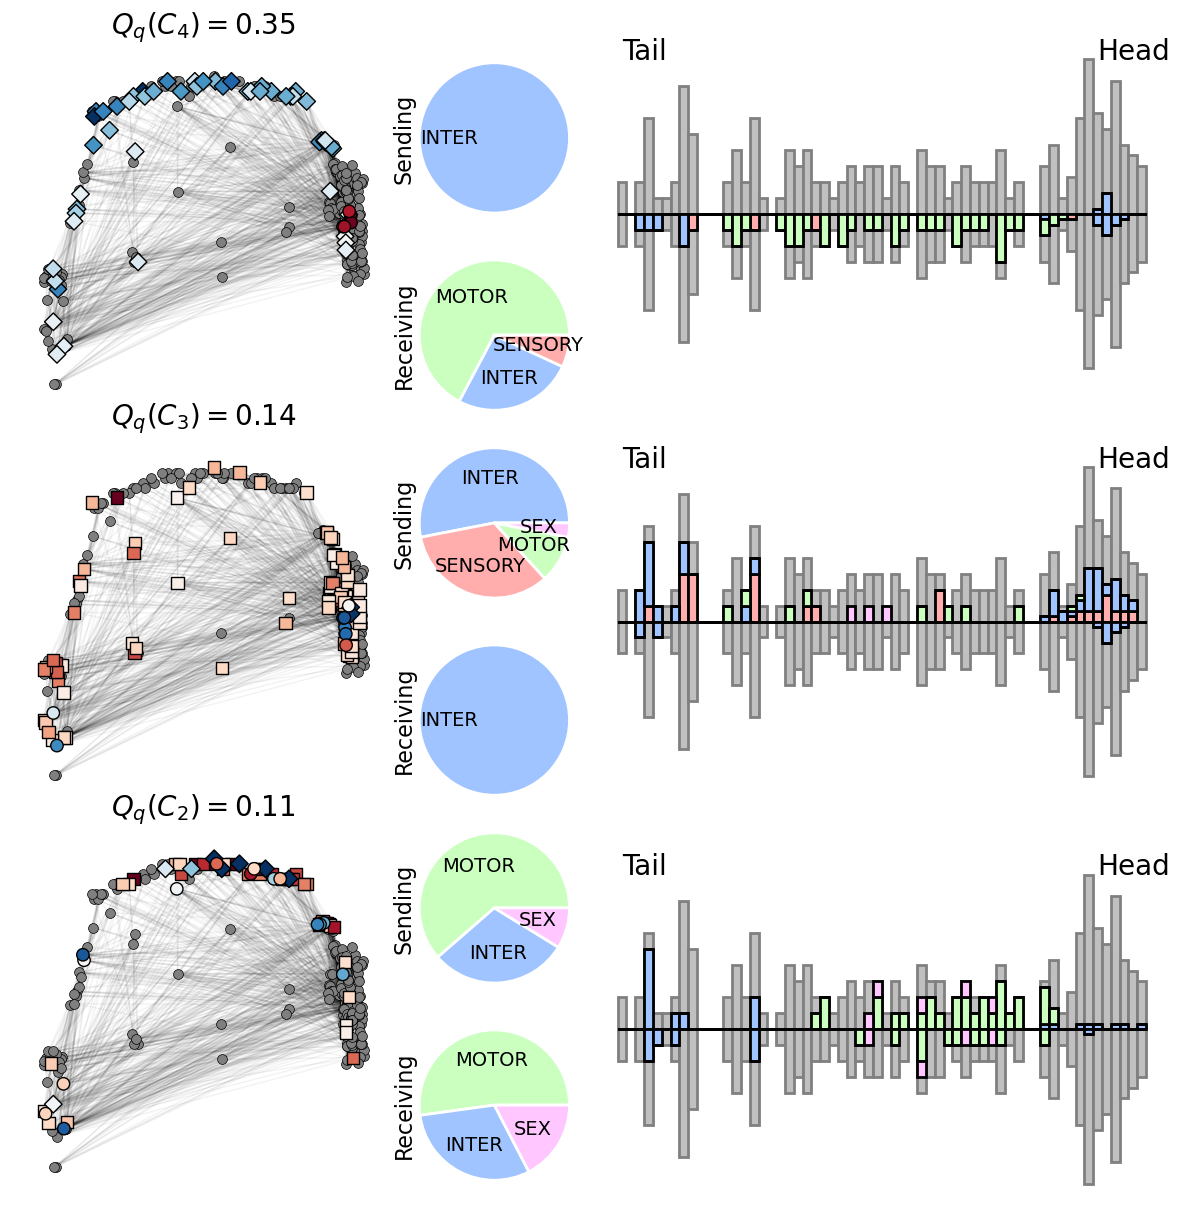

In [102]:
importlib.reload(dgsp_plot)

n_show_comp = 3

fig, axes = plt.subplots(ncols=3, figsize=(15, 5*len(sending_communities[:n_show_comp])),
                         gridspec_kw={"wspace":0, "width_ratios":[2, 1, 3]})

for ax in axes:
    ax.axis("off")

dgsp_plot.plot_all_bicommunity(graph, sending_communities[sorted_by_quad][:n_show_comp],
                               receiving_communities[sorted_by_quad][:n_show_comp],
                               fig=fig, axes=axes[0], nrows=3, draw_legend=False,
                               scatter_only=False, titles=titles[:n_show_comp], layout=graph_pos)

true_types = ["SENSORY NEURONS", "INTERNEURONS", "MOTOR NEURONS", "SEX SPECIFIC"]
manual_types = ["SENSORY", "INTER", "MOTOR", "SEX"]

n_bins = 60

count_weights = np.ones(n_bins)
count_weights[:47] = 3

gs_bars = GridSpecFromSubplotSpec(nrows=n_show_comp, ncols=1, subplot_spec=axes[2])
axes_bar = [fig.add_subplot(gs_bars[i], facecolor="none") for i in range(n_show_comp)]

for ax_i, com_id in enumerate(sorted_by_quad[:n_show_comp]):

    axes_bar[ax_i].axis("off")

    count, bins = np.histogram(angle, bins=n_bins)
    
    axes_bar[ax_i].text(0, count.max(), "Tail", fontsize=20)
    axes_bar[ax_i].text(0.9, count.max(), "Head", fontsize=20)
    
    axes_bar[ax_i].bar(bins[:-1], count_weights*count, width=1/n_bins, color="silver", alpha=1, edgecolor="gray", lw=2)
    axes_bar[ax_i].bar(bins[:-1], -count_weights*count, width=1/n_bins, color="silver", alpha=1, edgecolor="gray", lw=2)

    com_label = ["Send", "Receive"]
    mult = [1, -1]
    for com_i, com in enumerate([sending_communities[com_id], receiving_communities[com_id]]):
        fltr_com = com > 0
        count_previous = np.zeros_like(count, dtype=float)

        for i, n_type in enumerate(manual_types):
            #print(n_type)
            neurons_in_type = neuron_df.loc[type_mod == n_type, "Neuron"]
            type_mask = np.array([lab in neurons_in_type.values for lab in nodes_labels])

            mask = np.logical_and(type_mask, fltr_com)

            weights = np.ones_like(angle[mask])
            
            count_norm, _ = np.histogram(angle[mask], bins=bins, weights=mult[com_i]*weights)
            
            axes_bar[ax_i].bar(bins[:-1], count_weights*count_norm, width=1/n_bins, bottom=count_weights*count_previous, color=palette_rgb[i], lw=2, edgecolor="k")
            
            count_previous += count_norm.copy()
    #axes_bar[ax_i].legend(ncols=4)

pie_gs = GridSpecFromSubplotSpec(len(sending_communities[:n_show_comp]), 1, subplot_spec=axes[1], wspace=0, hspace=0)
pie_axes = [fig.add_subplot(pie_gs[i] ) for i in range(len(sending_communities[:n_show_comp]))]
dgsp_plot.plot_bicommunity_types(sending_communities[sorted_by_quad][:n_show_comp],
                       receiving_communities[sorted_by_quad][:n_show_comp], axes=pie_axes, fig=fig,
                       titles=titles, type_colors=colors, fontsize=14,
                       types=type_mod)

fig.savefig(op.join(path_to_figures, f"Figure-04-CelegansBicommunities-Nvec{vector_id_max}k{n_kmeans}-Show{n_show_comp}-v01.png"), dpi=300, bbox_inches="tight")

In [1400]:
importlib.reload(dgsp)

all_res = dgsp.benchmark_bimod(wiring_sym, k_max=10, n_vec_max=10, use_nodes=True,)

/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  receiving_communities = np.nan_to_num(
/Users/acionca/code/dGSP/dSVD/dgsp.py:415: RuntimeWarning: invalid value encountered in divide
  
/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  receiving_communities = np.nan_to_num(
/Users/acionca/code/dGSP/dSVD/dgsp.py:415: RuntimeWarning: invalid value encountered in divide
  
/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  receiving_communities = np.nan_to_num(
/Users/acionca/code/dGSP/dSVD/dgsp.py:415: RuntimeWarning: invalid value encountered in divide
  
/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: invalid value encountered in divide
  receiving_communities = np.nan_to_num(
/Users/acionca/code/dGSP/dSVD/dgsp.py:415: RuntimeWarning: invalid value encountered in divide
  
/Users/acionca/code/dGSP/dSVD/dgsp.py:410: RuntimeWarning: inval

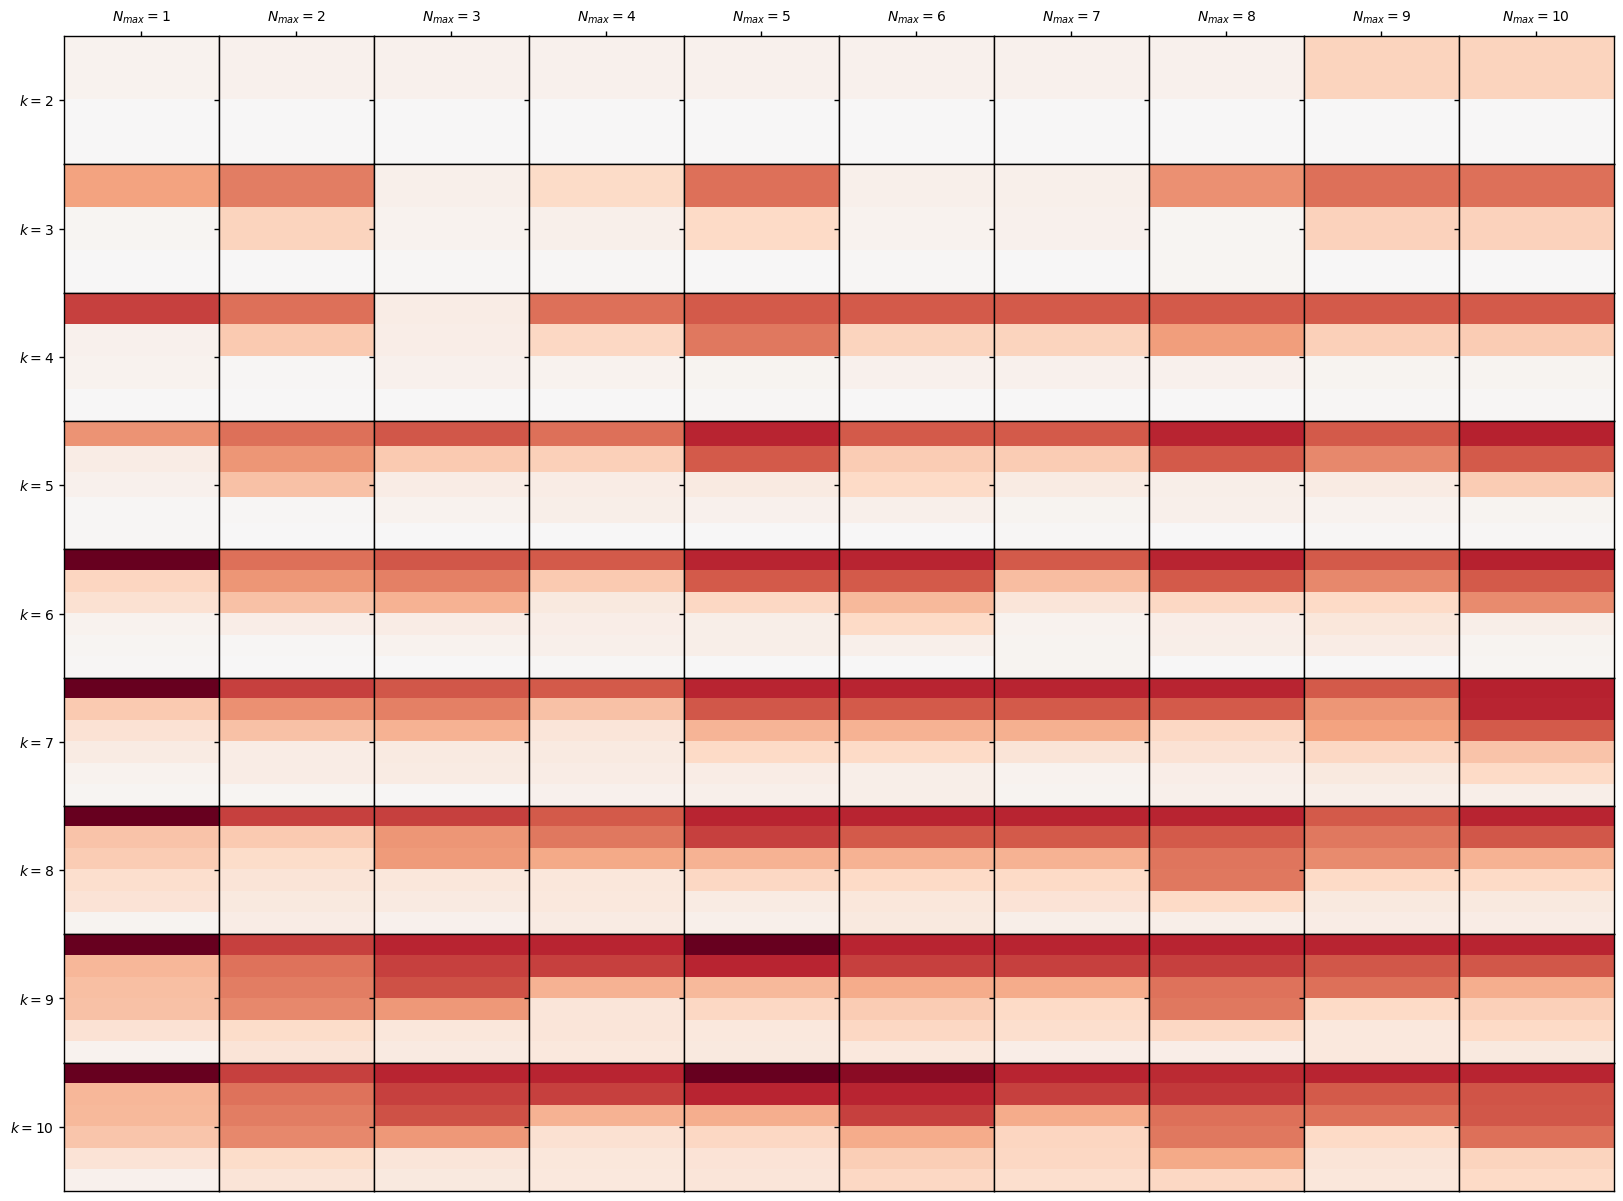

In [1401]:
maxval = max([np.max(np.abs(r_2)) for r in all_res for r_2 in r])

fig, axes = plt.subplots(ncols=len(all_res), nrows=len(all_res[0]),figsize=(20, 15), gridspec_kw={"hspace": 0, "wspace": 0}, sharey="row")

for n_vec_i, res in enumerate(all_res):
    for k_i, k_res in enumerate(res):
        k_res_show = k_res[:np.min([len(k_res), 6])]
        axes[k_i, n_vec_i].imshow(np.atleast_2d(k_res_show).T, label=f"k={k_i+1}",
                                  aspect="auto", cmap="RdBu_r", vmin=-maxval, vmax=maxval)
        axes[k_i, n_vec_i].set_yticks([len(k_res_show)/2-0.5], labels=[f"$k={k_i+2}$"])
        axes[k_i, n_vec_i].set_xticks([0], labels=[f"$N_{{max}}={n_vec_i+1}$"])


        axes[k_i, n_vec_i].set_xticks([])
        axes[k_i, n_vec_i].set_yticks([])
        axes[k_i, 0].set_yticks([len(k_res_show)/2-0.5], labels=[f"$k={k_i+2}$"])

    axes[0, n_vec_i].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    axes[0, n_vec_i].set_xticks([0], labels=[f"$N_{{max}}={n_vec_i+1}$"])

# Human connectome

In [782]:
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
from seaborn import kdeplot

import os.path as op
import sys
path_to_effective = "../../effectivedelay_estimation"
sys.path.append(path_to_effective)

from src import regmod
from src import utils
from src import solver

import importlib

In [783]:
path_to_data = op.join(path_to_effective, "resources")

# Could be 50, 100, 200, 400
delay_max = 100
#delay_max = 100
scale = 1

#path_to_data = f"/Users/acionca/data/F-TRACT-090624/{delay_max}" #/probability.txt.gz"
#path_to_ftract = f"/Users/acionca/data/F-TRACT-090624/{delay_max}" #/probability.txt.gz"

#filename = "adjacency_atlas.pkl"
filename = f"bundle_probability_atlas-scale{scale}.pkl"

bundle_prob = utils.load(op.join(path_to_data, filename))
bundle_prob = bundle_prob[:-2][:, :-2]
bundle_prob -= np.diag(np.diag(bundle_prob))
ftract_prob = utils.load(op.join(path_to_data, f"adj_probability_ftract-d{delay_max}-scale{scale}.pkl"))
ftract_prob = ftract_prob[:-2][:, :-2]

print(bundle_prob.shape)
print(ftract_prob.shape)

node_centers = utils.load(f"/Users/acionca/code/effectivedelay_estimation/resources/roi_centers-ftract-scale{scale}.pkl")[:82]

scale_to_nroi = {1:"33", 2:"60", 3:"125"}
#brain_regions_fname = "/Users/acionca/data/F-TRACT-090624/Lausanne2008-33 (1).txt"
#with open(brain_regions_fname) as f:
#    labels = f.readlines()
#labels = [lab.strip().split("ctx-")[-1] for lab in labels[:-2]]

brain_regions_fname = f"/Users/acionca/data/f-tract_v2112/ages_0_15/sr_8.40/seg_None_None/pl_200/Lausanne2008-{scale_to_nroi[scale]}/export/peak_latency/peak_latency.csv"
with open(brain_regions_fname) as f:
    labels = f.readlines()[5:]

labels = [lab.strip().split("ctx-")[-1].split(",")[0] for lab in labels[:-2]]

hemi_split = labels[0].split("lh")[1][0]

labels = ["lhsc"+hemi_split+lab.split("Left-")[-1] if "Left" in lab else lab for lab in labels]
labels = ["rhsc"+hemi_split+lab.split("Right-")[-1] if "Right" in lab else lab for lab in labels]

labels = [lab.replace(hemi_split, "-") for lab in labels]

print(f"There are {len(labels)} nodes in the graph")
all_types = ["lh", "rh", "lhsc", "rhsc"]
types_rename = ["Left", "Right", "Left-sub", "Right-sub"]
type2num = {t:i for i, t in enumerate(all_types)}

node_type = [type2num[lab.split("-")[0]] for lab in labels]
labels = ["-".join(lab.split("-")[1:]) for lab in labels]

(82, 82)
(82, 82)
There are 82 nodes in the graph


Directed connectome has shape: (82, 82)


/var/folders/nj/ltrlv15x5jj2jq78pbb2srz80000gn/T/ipykernel_49247/2742151077.py:6: RuntimeWarning: invalid value encountered in divide
  k_matrix = (2 * bundle_prob * ftract_prob)/(ftract_prob + ftract_prob.T)


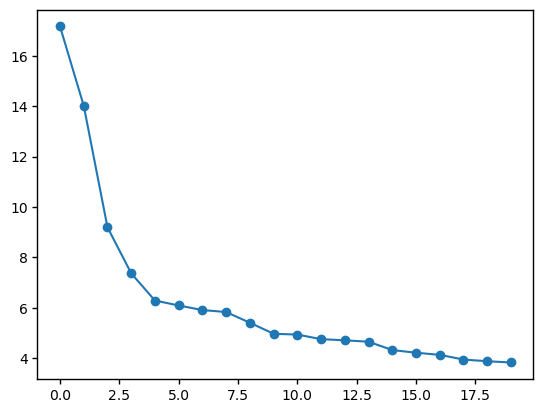

In [918]:
# HERE
# k[i, j] = 2*s[i, j]*f[i,j]/(f[i,j] + f[j,i])

k_threshold = 0
#k_matrix = ((2 * (bundle_prob > 0.1).astype(int) * ftract_prob)/(ftract_prob + ftract_prob.T) >= k_threshold).astype(int)
k_matrix = (2 * bundle_prob * ftract_prob)/(ftract_prob + ftract_prob.T)
#k_matrix = ((2 * bundle_prob * ftract_prob)/(ftract_prob + ftract_prob.T) >= k_threshold).astype(int)

#k_matrix += k_matrix.T
#k_matrix = (k_matrix > 0).astype(int)

k_matrix = np.nan_to_num(k_matrix)

if k_threshold > 0:
    k_matrix = (k_matrix >= k_threshold).astype(int)

k_matrix -= np.diag(np.diag(k_matrix))

print(f"Directed connectome has shape: {k_matrix.shape}")
from matplotlib.patheffects import withStroke
from matplotlib.lines import Line2D

vec_id = 0
alpha_perc = 20
add_spectrum = False
save_fig = True

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(k_matrix), fix_negative=False)
V = Vh.T

plt.plot(S[:20], "-o")

Found 4 clusters !
(82, 3)


/Users/acionca/code/dGSP/dSVD/dgsp.py:406: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),
/Users/acionca/code/dGSP/dSVD/dgsp.py:411: RuntimeWarning: invalid value encountered in divide
  receiving_communities / np.sum(edge_clusters_mat > 0, axis=0),


(<Figure size 2400x800 with 6 Axes>, <Axes: >)

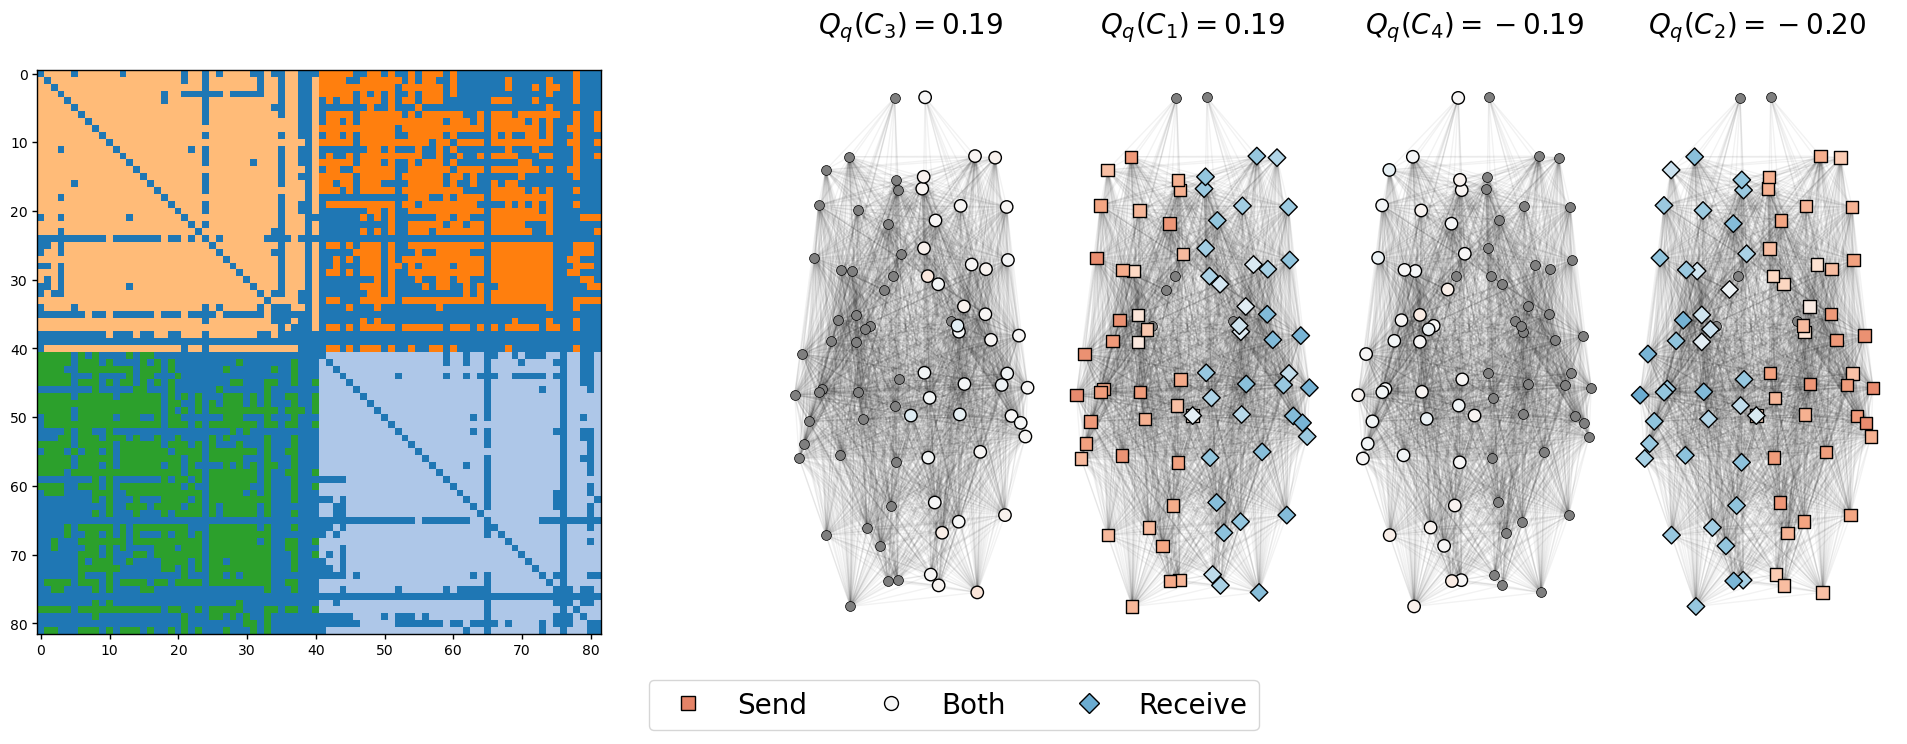

In [919]:
importlib.reload(dgsp)
importlib.reload(dgsp_plot)

graph = k_matrix

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph, null_model="outin"))
V = Vh.T

n_nodes = graph.shape[0]

vector_id_max = 2

scale_factor = S**2/(S**2).sum()
edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(graph, U, V, vector_id_max, method="kmeans",
                                                           n_kmeans=4, verbose=True, max_k=20, scale_S=scale_factor[:vector_id_max])
n_clusters = np.max(edge_clusters)

sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")

fig, axes = plt.subplots(ncols=2, figsize=(24, 8), gridspec_kw={"width_ratios": [1, 2]})

# Edge colors
#graph_pos = {i: (U[i, vector_id], V[i, vector_id]) for i in range(n_nodes)}
print(node_centers.shape)
graph_pos = {i: (x, y) for i, (x, y) in enumerate(zip(node_centers[:, 0], node_centers[:, 1]))}
labels = {i: "" for i in range(n_nodes)}

edge_list = nx.DiGraph(graph).edges()

axes[0].imshow(edge_clusters_mat, cmap="tab20", interpolation="none", vmin=0, vmax=20)

bimod_quad = dgsp.bimod_index_nodes(graph, sending_communities, receiving_communities, scale=True)
#bimod_quad = bimod_quad**sum_power/np.sum(bimod_quad**sum_power)
sorted_by_quad = np.flip(np.argsort(bimod_quad))

titles = [f"$Q_{{q}}(C_{{{i+1}}})={bimod_quad[i]:1.2f}$" for i in range(n_clusters)]
titles = np.array(titles)[sorted_by_quad]
dgsp_plot.plot_all_bicommunity(graph, sending_communities, receiving_communities, fig=fig, axes=axes[1],
                               scatter_only=False, titles=titles, layout=graph_pos)

(<Figure size 1000x1000 with 5 Axes>, <Axes: >)

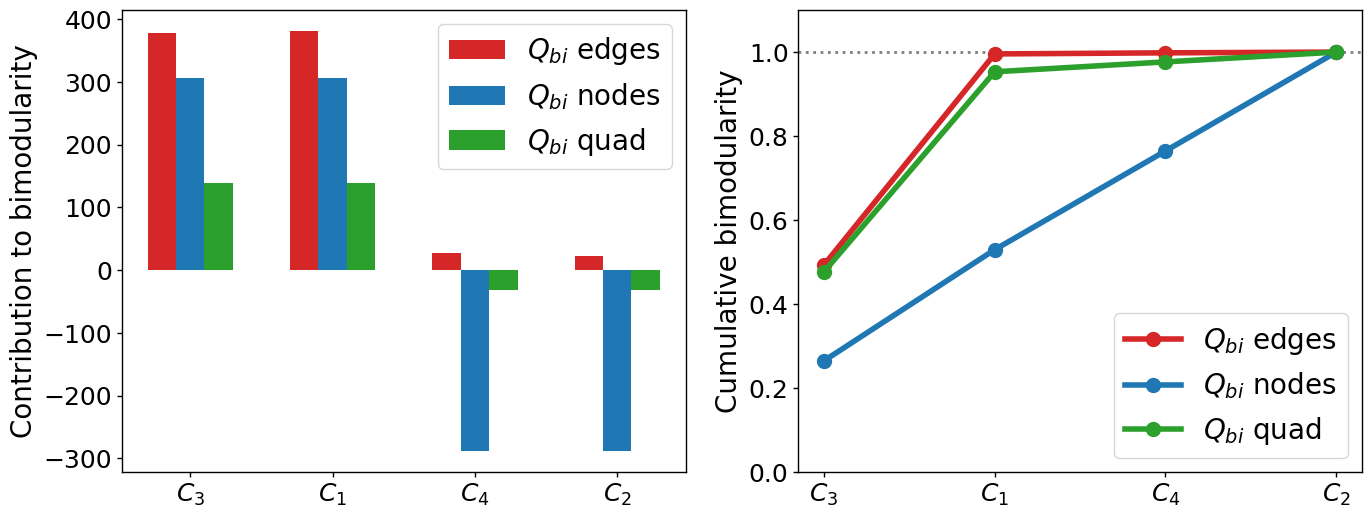

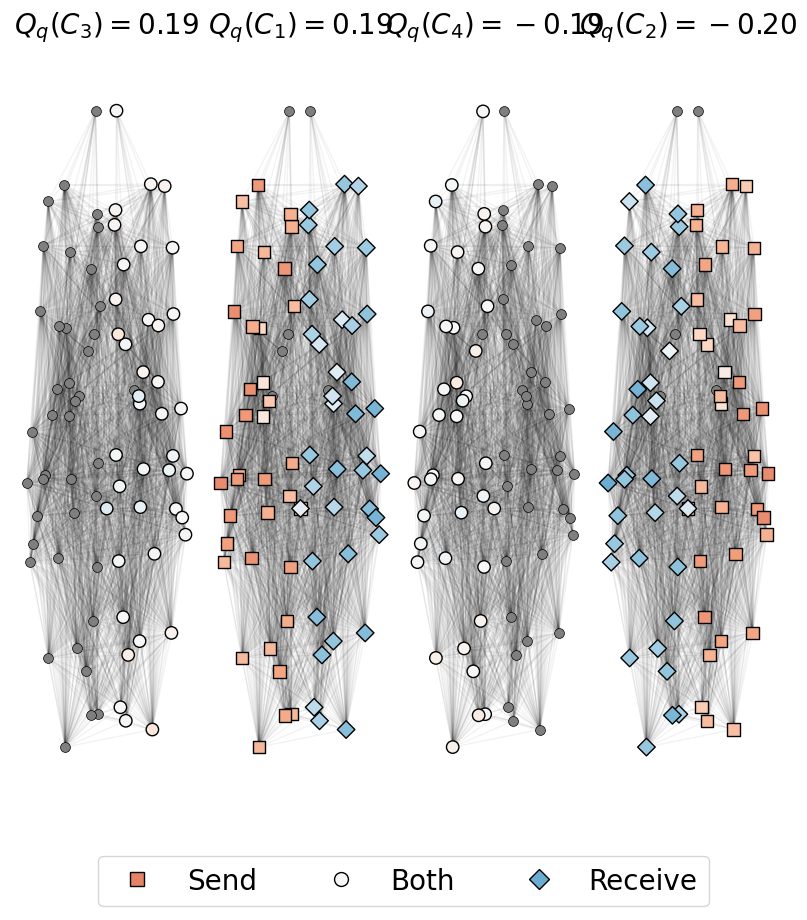

In [920]:
fig, axes = plt.subplots(figsize=(16, 6))
dgsp_plot.plot_all_bimod_indices(graph, edge_clusters_mat, sending_communities, receiving_communities, fig=fig, axes=axes)

fig, axes = plt.subplots(figsize=(5*len(sending_communities)//2, 10))
dgsp_plot.plot_all_bicommunity(graph, sending_communities, receiving_communities, fig=fig, axes=axes,
                               scatter_only=False, titles=titles, layout=graph_pos)

In [923]:
importlib.reload(dgsp)

all_res = dgsp.benchmark_bimod(k_matrix, k_max=16, n_vec_max=5, use_nodes=True)

/Users/acionca/code/dGSP/dSVD/dgsp.py:406: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),
/Users/acionca/code/dGSP/dSVD/dgsp.py:411: RuntimeWarning: invalid value encountered in divide
  receiving_communities / np.sum(edge_clusters_mat > 0, axis=0),
/Users/acionca/code/dGSP/dSVD/dgsp.py:406: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),
/Users/acionca/code/dGSP/dSVD/dgsp.py:411: RuntimeWarning: invalid value encountered in divide
  receiving_communities / np.sum(edge_clusters_mat > 0, axis=0),
/Users/acionca/code/dGSP/dSVD/dgsp.py:406: RuntimeWarning: invalid value encountered in divide
  sending_communities / np.sum(edge_clusters_mat > 0, axis=1),
/Users/acionca/code/dGSP/dSVD/dgsp.py:411: RuntimeWarning: invalid value encountered in divide
  receiving_communities / np.sum(edge_clusters_mat > 0, axis=0),
/Users/acionca/code/dGSP/dSVD/dgsp.py:406: Run

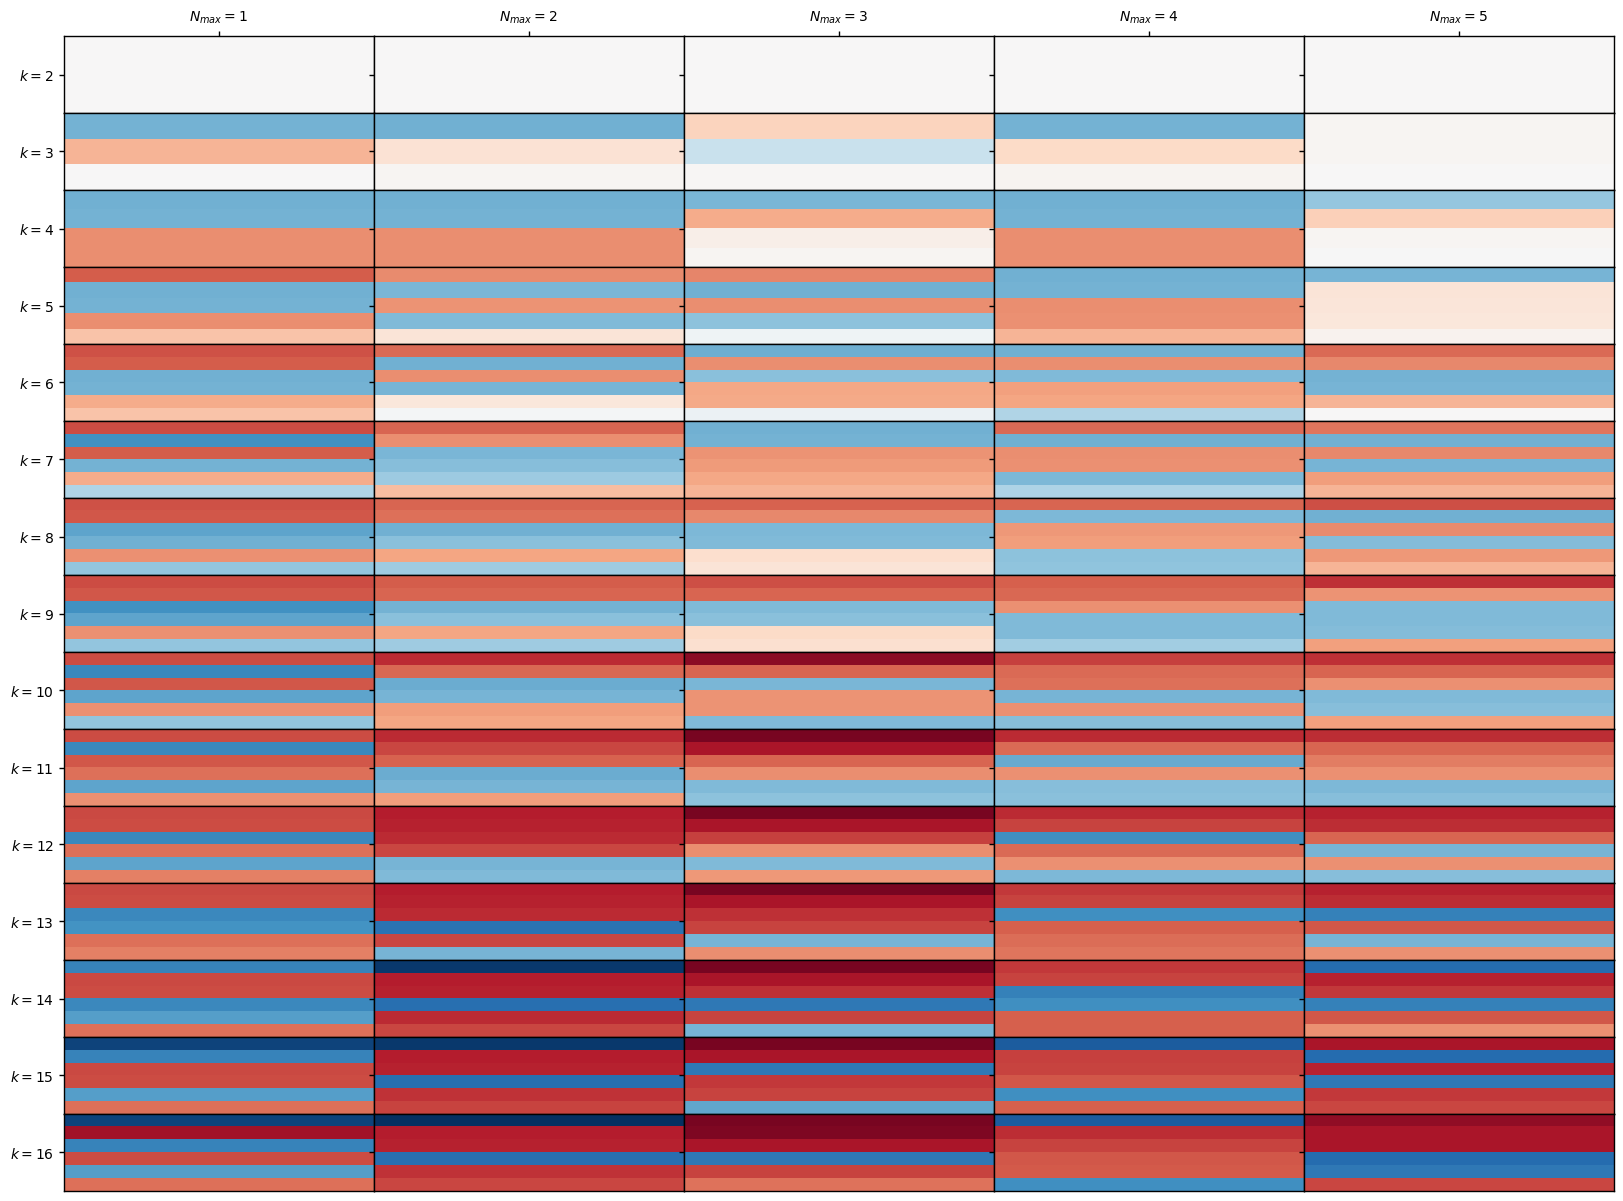

In [924]:
max_n_show = 6
maxval = max([np.max(np.abs(r_2)) for r in all_res for r_2 in r])

fig, axes = plt.subplots(ncols=len(all_res), nrows=len(all_res[0]),figsize=(20, 15), gridspec_kw={"hspace": 0, "wspace": 0}, sharey="row")

for n_vec_i, res in enumerate(all_res):
    for k_i, k_res in enumerate(res):
        axes[k_i, n_vec_i].set_xticks([])
        axes[k_i, n_vec_i].set_yticks([])

        k_res_show = k_res[:np.min([len(k_res), max_n_show])]
        axes[k_i, n_vec_i].imshow(np.atleast_2d(k_res_show).T, label=f"k={k_i+1}",
                                  aspect="auto", cmap="RdBu_r", vmin=-maxval, vmax=maxval)
        
        axes[k_i, 0].set_yticks([len(k_res_show)/2-0.5], labels=[f"$k={k_i+2}$"])
    
    axes[0, n_vec_i].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    axes[0, n_vec_i].set_xticks([0], labels=[f"$N_{{max}}={n_vec_i+1}$"])

In [925]:
import nibabel as nib
from nilearn.surface import vol_to_surf
from nilearn.plotting import plot_surf_stat_map

from skimage.filters.rank import mean
from skimage.segmentation import expand_labels

path_to_ressources = "/Users/acionca/code/effectivedelay_estimation/resources"

path_to_mesh = op.join(path_to_ressources, "brainmesh")

# Load the mesh files and store the vertices and faces IDs
all_vertices = []
all_faces = []
n_faces = 0
for mesh_file, sign_factor in zip(["Test_smth_LH.nv", "Test_smth_RH.nv"], [1, -1]):
    #with open(op.join(path_to_mesh, "Test_smth_LH.nv"), 'r') as f:
    with open(op.join(path_to_mesh, mesh_file), 'r') as f:
        data = f.read().splitlines()
    n_vertices = int(data[0])

    all_vertices += [row.split(" ") for row in data[1:n_vertices+1]]
    all_faces_array = np.array([(row.split(" ")) for row in data[n_vertices+2:]])
    all_faces += (all_faces_array.astype(int) + n_faces).tolist()

    n_faces = all_faces_array.astype(int).max()

# Convert to Numpy arrays
all_vertices = np.array(all_vertices, dtype=float)
all_faces = np.array(all_faces, dtype=int) - 1

In [926]:
com_id = 3

vol_value = sending_communities[com_id] - receiving_communities[com_id]

path_to_atlas = op.join(path_to_ressources, "roi_atlas-ftract-scale1-GM.nii.gz")
roi_atlas = nib.load(path_to_atlas)
atlas_data = roi_atlas.get_fdata()

stat_map = np.zeros_like(atlas_data, dtype=float)
for i, roi in enumerate(labels):
    stat_map[atlas_data == i+1] = vol_value[i]

n_smooth = 1
#stat_map = mean(stat_map, np.ones((n_smooth, n_smooth, n_smooth)))

stat_map = expand_labels(stat_map, 3)

surf_map = nib.Nifti1Image(stat_map, roi_atlas.affine)
#surf_map.header.set_data_dtype(np.float32)

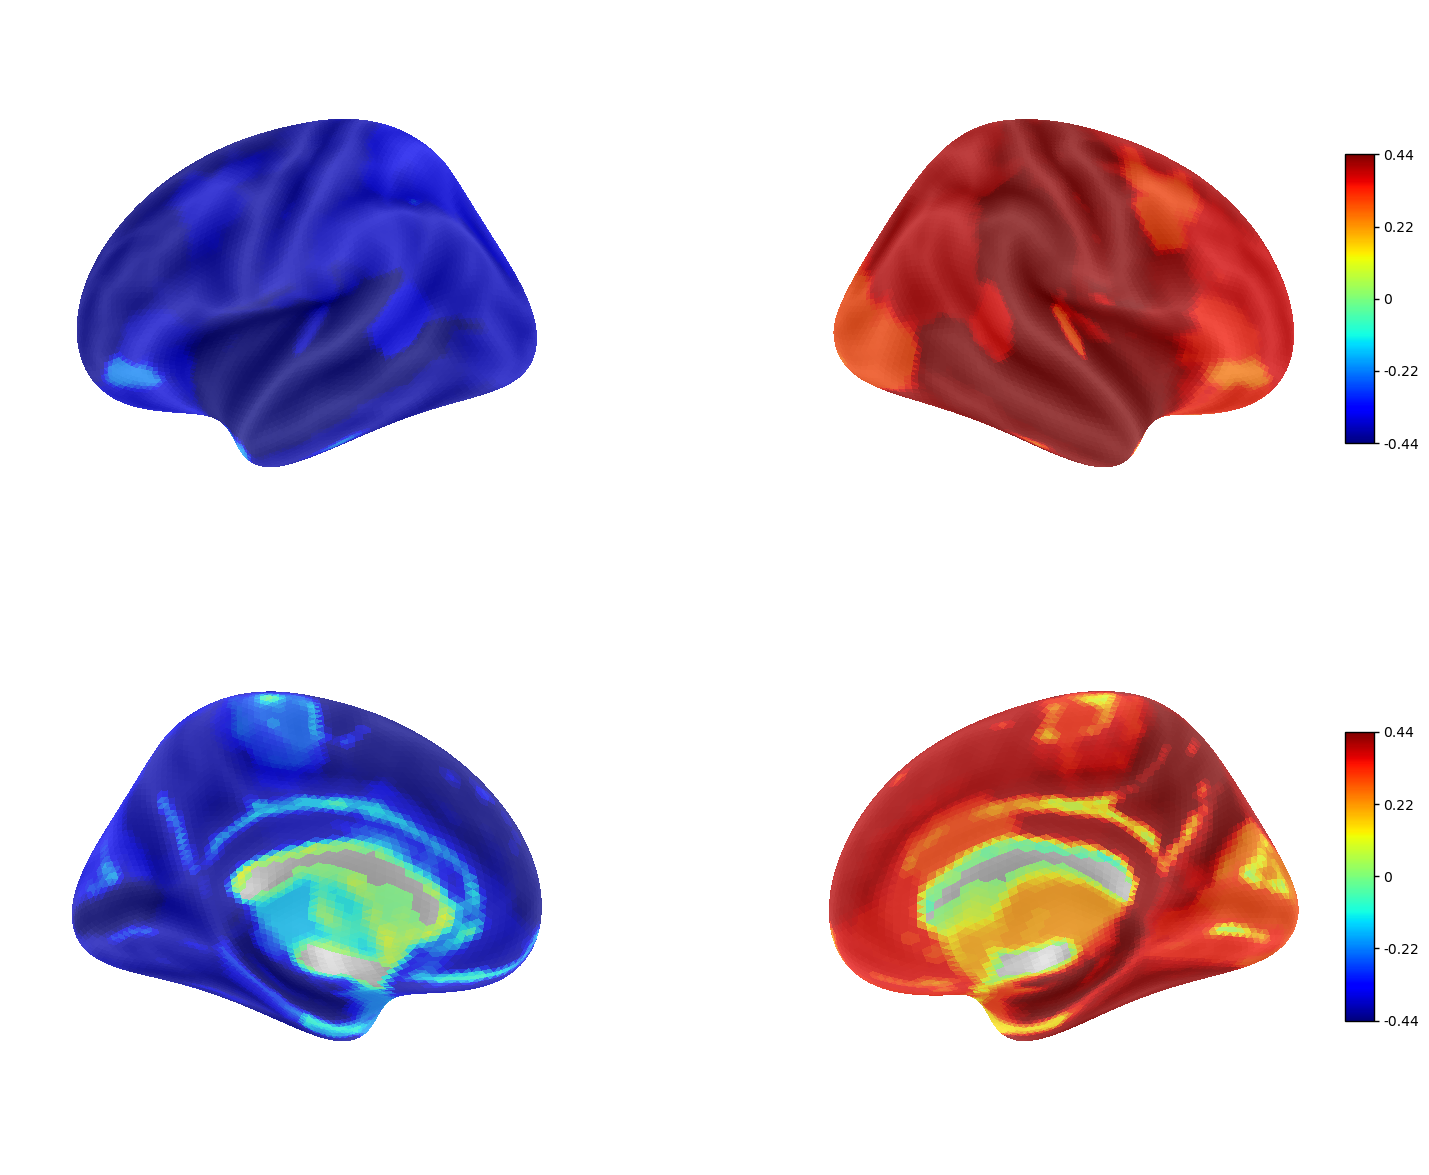

In [927]:
from nilearn import datasets

fsaverage = datasets.fetch_surf_fsaverage("fsaverage5")
#fsaverage = datasets.fetch_surf_fsaverage("fsaverage6")

inflate = True

surf_cmap = "RdBu_r"
surf_cmap = "jet"
max_value =  0.9*np.abs(vol_value).max() #0.5

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), subplot_kw={"projection": "3d"}, gridspec_kw={"wspace": 0, "hspace": 0})

hemis = ["left", "right"]
surf_def = [fsaverage.pial_left, fsaverage.pial_right]
if inflate:
    hemis_def = [fsaverage.infl_left, fsaverage.infl_right]
else:
    hemis_def = [fsaverage.pial_left, fsaverage.pial_right]
bgs = [fsaverage.sulc_left, fsaverage.sulc_right]

views = ["lateral", "medial"]

for ax_i, ax in enumerate(axes.flatten()):
    texture = vol_to_surf(surf_map, surf_def[ax_i % 2], interpolation="nearest")
    figure = plot_surf_stat_map(hemis_def[ax_i % 2],
                                texture,
                                hemi=hemis[ax_i % 2],
                                view=views[ax_i // 2],
                                colorbar=bool(ax_i % 2),
                                threshold=1e-4,
                                bg_map=bgs[ax_i % 2],
                                cmap=surf_cmap,
                                bg_on_data=True,
                                darkness=1,
                                vmax=max_value,
                                axes=ax)

#fig.savefig(op.join(path_to_figures, f"12-ftract-bimod{'-undir'*undir}{vec_id}{'noHemi'*(remove_hemi is not None)}-Surface{fig.get_size_inches()}.png"),
#            dpi=300, bbox_inches="tight")